In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, recall_score, classification_report, precision_score
from sklearn.metrics import f1_score, precision_recall_curve, roc_curve, roc_auc_score, average_precision_score
from sklearn.metrics import  plot_precision_recall_curve, plot_roc_curve, balanced_accuracy_score, get_scorer
import pydotplus
import collections
from sklearn.tree import export_graphviz
from mlxtend.plotting import plot_confusion_matrix as ml_plot_confusion_matrix
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
df= pd.read_csv('data.csv')

In [3]:
df.shape

(2747, 72)

In [4]:
df.head()

,Address,C.O,MahMorajeh,Fasl,Jens,Sen,Savad,Tahsil.Mikonad,Madrak,Faaliat,...,Rahn,Hazine_Maskan,Hazine_Noshidani,Hazine_Pushak,Hazine_Tafrihat,Daramad_Yarane,Daramad_Azad,Daramad_Motefaraghe,Daramad_Mozd_Month,Daramad_Mozd_Year
0,10001000102,0,11,4,1,60,1,2.0,1.0,3,...,0,10135000,NaN,1190000.0,NaN,21840000.0,NaN,176000000.0,NaN,NaN
1,10001000105,0,11,4,1,72,2,NaN,NaN,3,...,0,9028000,NaN,430000.0,NaN,5460000.0,NaN,152000000.0,NaN,NaN
2,10001000108,0,11,4,1,77,1,2.0,6.0,3,...,0,9155000,300000.0,800000.0,NaN,16380000.0,NaN,544000000.0,NaN,NaN
3,10001000111,0,11,4,1,58,1,2.0,6.0,3,...,0,9566000,NaN,1720000.0,NaN,21840000.0,NaN,248000000.0,NaN,NaN
4,10001000114,0,11,4,1,54,1,2.0,4.0,3,...,0,9420000,NaN,500000.0,200000.0,21840000.0,NaN,308000000.0,12000000.0,144000000.0


In [5]:
df.describe(include='all')

,Address,C.O,MahMorajeh,Fasl,Jens,Sen,Savad,Tahsil.Mikonad,Madrak,Faaliat,...,Rahn,Hazine_Maskan,Hazine_Noshidani,Hazine_Pushak,Hazine_Tafrihat,Daramad_Yarane,Daramad_Azad,Daramad_Motefaraghe,Daramad_Mozd_Month,Daramad_Mozd_Year
count,2.747000e+03,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2337.000000,2337.000000,2747.000000,...,2.747000e+03,2.747000e+03,6.480000e+02,1.454000e+03,1.030000e+03,2.539000e+03,7.870000e+02,1.428000e+03,1.500000e+03,1.500000e+03
mean,1.172098e+10,17.174008,6.508919,2.489989,1.131780,49.709137,1.149254,1.959777,3.147197,1.784856,...,3.589603e+07,7.212064e+06,9.691879e+05,2.082189e+06,7.796971e+05,1.776883e+07,2.063638e+08,1.426922e+08,1.718843e+07,2.052350e+08
std,1.083153e+09,10.845247,3.442088,1.115747,0.338313,15.100255,0.356403,0.196523,2.042712,1.128949,...,1.096643e+08,5.000758e+06,9.541404e+05,2.915415e+06,4.586095e+06,6.590929e+06,3.009585e+08,1.464801e+08,1.354441e+07,1.409432e+08
min,1.000100e+10,0.000000,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000e+00,5.000000e+05,9.000000e+03,1.000000e+04,1.000000e+04,2.730000e+06,-1.750000e+08,1.500000e+05,0.000000e+00,2.000000e+06
25%,1.130216e+10,13.000000,4.000000,1.000000,1.000000,37.000000,1.000000,2.000000,1.000000,1.000000,...,0.000000e+00,4.415000e+06,3.000000e+05,4.700000e+05,1.300000e+05,1.092000e+07,1.000000e+08,3.600000e+07,1.000000e+07,1.200000e+08
50%,1.250130e+10,25.000000,7.000000,2.000000,1.000000,48.000000,1.000000,2.000000,2.000000,1.000000,...,0.000000e+00,5.821000e+06,7.500000e+05,1.070000e+06,3.250000e+05,1.638000e+07,1.680000e+08,1.245000e+08,1.500000e+07,1.815500e+08
75%,1.260332e+10,26.000000,9.000000,3.000000,1.000000,60.000000,1.000000,2.000000,4.000000,3.000000,...,0.000000e+00,8.221500e+06,1.350000e+06,2.522500e+06,7.000000e+05,2.184000e+07,2.400000e+08,2.066775e+08,2.100000e+07,2.562413e+08
max,1.300638e+10,30.000000,12.000000,4.000000,2.000000,95.000000,2.000000,2.000000,9.000000,6.000000,...,2.000000e+09,6.060000e+07,8.100000e+06,3.520000e+07,1.400000e+08,5.460000e+07,7.124000e+09,2.500000e+09,2.250000e+08,1.423000e+09


In [6]:
df.columns

Index(['Address', 'C.O', 'MahMorajeh', 'Fasl', 'Jens', 'Sen', 'Savad',
       'Tahsil.Mikonad', 'Madrak', 'Faaliat', 'Zanashoi', 'tedad.a', 'n.t.m',
       't.o', 's.z', 'n.e', 'm.o.b', 'oto', 'mo', 'do', 'radio', 'zabt',
       'tv.s', 'tv.r', 'video', 'pc', 'mobile', 'freeizer', 'yakhchal',
       'yakhchal.f', 'gaz', 'jaro.b', 'm.lebas', 'charkh.kh', 'panke',
       'cooler.a', 'cooler.g', 'm.zarf', 'microfer', 'ab.l', 'bargh', 'gaz.l',
       'tel', 'internet', 'hamam', 'ashpazkhane', 'cooler.a.s', 'broodat.m',
       'hararat.m', 'package', 'cooler.g.s', 'fazelab', 'sookht.p', 'sookht.g',
       'sookht.ab', 'Hazine_Behdashti', 'Hazine_Ertebatat',
       'Hazine_Ghazayeamade', 'Hazine_Hamlonaghl', 'Hazine_kalavakhadamat',
       'Hazine_Khorakivadokhani', 'Hazine_lavazemkhanegi', 'Rahn',
       'Hazine_Maskan', 'Hazine_Noshidani', 'Hazine_Pushak', 'Hazine_Tafrihat',
       'Daramad_Yarane', 'Daramad_Azad', 'Daramad_Motefaraghe',
       'Daramad_Mozd_Month', 'Daramad_Mozd_Year'],
 

### All the Na values in out come means the family did not have that but because it is possible that log of them would be useful and number's scales are large I use 1 instead of 0

In [7]:
# For Daramad Variables:
df.loc[df['Daramad_Azad'].isna(), 'Daramad_Azad']= 1
df.loc[df['Daramad_Motefaraghe'].isna(), 'Daramad_Motefaraghe']= 1
df.loc[df['Daramad_Mozd_Year'].isna(), 'Daramad_Mozd_Year']= 1
df.loc[df['Daramad_Yarane'].isna(), 'Daramad_Yarane']= 1
df.loc[df['Daramad_Mozd_Month'].isna(), 'Daramad_Mozd_Month']= 1

# For Hazine Variables:
df.loc[df['Hazine_Tafrihat'].isna(), 'Hazine_Tafrihat']= 1
df.loc[df['Hazine_Pushak'].isna(), 'Hazine_Pushak']= 1
df.loc[df['Hazine_Noshidani'].isna(), 'Hazine_Noshidani']= 1
df.loc[df['Hazine_Maskan'].isna(), 'Hazine_Maskan']= 1
df.loc[df['Rahn'].isna(), 'Rahn']= 1
df.loc[df['Rahn']==0, 'Rahn']= 1
df.loc[df['Hazine_lavazemkhanegi'].isna(), 'Hazine_lavazemkhanegi']= 1
df.loc[df['Hazine_Khorakivadokhani'].isna(), 'Hazine_Khorakivadokhani']= 1
df.loc[df['Hazine_kalavakhadamat'].isna(), 'Hazine_kalavakhadamat']= 1
df.loc[df['Hazine_Hamlonaghl'].isna(), 'Hazine_Hamlonaghl']= 1
df.loc[df['Hazine_Ghazayeamade'].isna(), 'Hazine_Ghazayeamade']= 1
df.loc[df['Hazine_Ertebatat'].isna(), 'Hazine_Ertebatat']= 1
df.loc[df['Hazine_Behdashti'].isna(), 'Hazine_Behdashti']= 1


## Now we start making y variable:

In [8]:
df['Daramad_kol_Mounth']= ( df['Daramad_Azad']+ df['Daramad_Motefaraghe']+ df['Daramad_Mozd_Year']+ df['Daramad_Yarane'])/12

In [9]:
df.loc[df['Daramad_kol_Mounth']<1, 'Daramad_kol_Mounth']= 1

(0.0, 200000000.0)

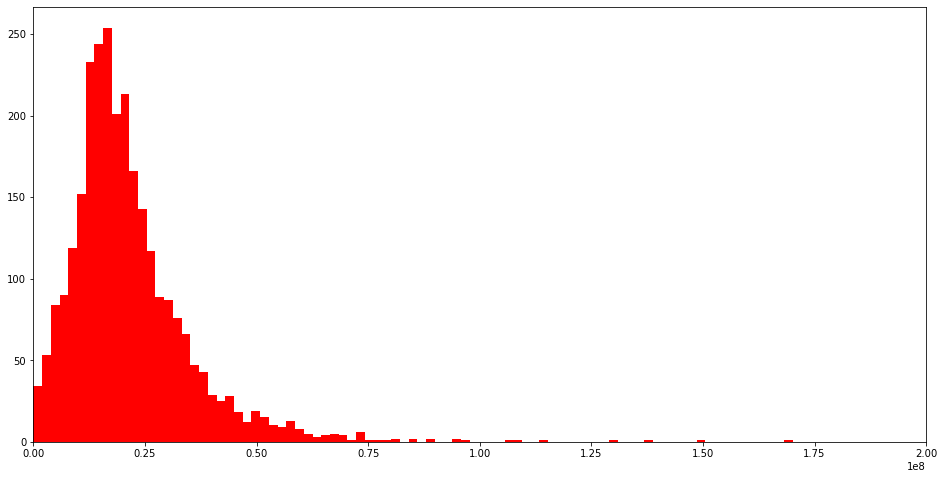

In [10]:
plt.figure(figsize= (16, 8))
plt.hist((df['Daramad_kol_Mounth']), bins= 'auto', color= 'r')
plt.xlim(0, 200000000)

This figure is The Cumulative distribution of our new variable

In [11]:
# Make Our Binary out come
df.loc[df['Daramad_kol_Mounth']<= df['Daramad_kol_Mounth'].quantile(0.7), 'Y']= 0
df.loc[df['Daramad_kol_Mounth']> df['Daramad_kol_Mounth'].quantile(0.7), 'Y']= 1

In [12]:
df['Y'].value_counts()

0.0    1923
1.0     824
Name: Y, dtype: int64

### Y= 1 shows that household is in 3 decile of richer households Y= 0 means household is not in 3 decile of richer households

In [13]:
df.head()

,Address,C.O,MahMorajeh,Fasl,Jens,Sen,Savad,Tahsil.Mikonad,Madrak,Faaliat,...,Hazine_Noshidani,Hazine_Pushak,Hazine_Tafrihat,Daramad_Yarane,Daramad_Azad,Daramad_Motefaraghe,Daramad_Mozd_Month,Daramad_Mozd_Year,Daramad_kol_Mounth,Y
0,10001000102,0,11,4,1,60,1,2.0,1.0,3,...,1.0,1190000.0,1.0,21840000.0,1.0,176000000.0,1.0,1.0,1.648667e+07,0.0
1,10001000105,0,11,4,1,72,2,NaN,NaN,3,...,1.0,430000.0,1.0,5460000.0,1.0,152000000.0,1.0,1.0,1.312167e+07,0.0
2,10001000108,0,11,4,1,77,1,2.0,6.0,3,...,300000.0,800000.0,1.0,16380000.0,1.0,544000000.0,1.0,1.0,4.669833e+07,1.0
3,10001000111,0,11,4,1,58,1,2.0,6.0,3,...,1.0,1720000.0,1.0,21840000.0,1.0,248000000.0,1.0,1.0,2.248667e+07,0.0
4,10001000114,0,11,4,1,54,1,2.0,4.0,3,...,1.0,500000.0,200000.0,21840000.0,1.0,308000000.0,12000000.0,144000000.0,3.948667e+07,1.0


## C.O variable is the name of city
### (0 is 'Markazi')&(13 is 'Hamedan')&(25 is 'Qom')&(26 is 'Qazvin')&(30 is 'Alborz')

In [14]:
df['C.O'].value_counts()

13    774
0     590
25    539
30    424
26    420
Name: C.O, dtype: int64

In [15]:
df.loc[df['C.O']== 0, 'C.O']= 'Markazi'
df.loc[df['C.O']== 13, 'C.O']= 'Hamedan'
df.loc[df['C.O']== 25, 'C.O']= 'Qom'
df.loc[df['C.O']== 26, 'C.O']= 'Qazvin'
df.loc[df['C.O']== 30, 'C.O']= 'Alborz'

In [16]:
CO_C= df['C.O'].value_counts()
CO_C

Hamedan    774
Markazi    590
Qom        539
Alborz     424
Qazvin     420
Name: C.O, dtype: int64

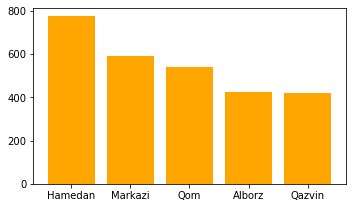

In [17]:
plt.figure(figsize= (5, 3))
plt.bar(range(len(CO_C)), CO_C, color= 'orange' )
plt.xticks(range(len(CO_C)), CO_C.index)
plt.tight_layout()

In [18]:
# The frequency of cities

In [19]:
COagg=df.groupby('C.O').aggregate([np.mean])
COagg

,Address,MahMorajeh,Fasl,Jens,Sen,Savad,Tahsil.Mikonad,Madrak,Faaliat,Zanashoi,...,Hazine_Noshidani,Hazine_Pushak,Hazine_Tafrihat,Daramad_Yarane,Daramad_Azad,Daramad_Motefaraghe,Daramad_Mozd_Month,Daramad_Mozd_Year,Daramad_kol_Mounth,Y
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
C.O,,,,,,,,,,,,,,,,,,,,,
Alborz,1.300199e+10,6.419811,2.464623,1.115566,49.882075,1.087264,1.994832,3.405685,1.771226,1.242925,...,162105.750000,1.160342e+06,411929.693396,1.489374e+07,8.256097e+07,9.867225e+07,1.330312e+07,1.504354e+08,2.888020e+07,0.438679
Hamedan,1.130446e+10,6.467700,2.490956,1.164083,51.745478,1.200258,1.990307,3.111470,1.899225,1.198966,...,260607.970284,8.503882e+05,329654.472868,1.727824e+07,5.614341e+07,6.122239e+07,7.156848e+06,8.610925e+07,1.839611e+07,0.222222
Markazi,1.000557e+10,6.516949,2.494915,1.100000,50.989831,1.155932,1.987952,2.955823,1.794915,1.159322,...,214768.152542,1.297721e+06,185744.710169,1.641856e+07,5.820761e+07,8.134871e+07,8.082237e+06,9.981525e+07,2.131584e+07,0.320339
Qazvin,1.260368e+10,6.611905,2.500000,1.114286,48.157143,1.130952,1.967123,2.813699,1.711905,1.128571,...,307373.350000,1.283584e+06,286024.454762,1.690975e+07,5.636905e+07,7.199203e+07,9.691394e+06,1.119219e+08,2.143273e+07,0.269048
Qom,1.250131e+10,6.549165,2.495362,1.146568,46.456401,1.131725,1.854701,3.444444,1.677180,1.157699,...,188835.667904,1.062261e+06,266343.812616,1.602545e+07,4.810751e+07,6.736336e+07,1.069354e+07,1.326922e+08,2.201571e+07,0.304267


In [20]:
COagg.columns

MultiIndex([(                'Address', 'mean'),
            (             'MahMorajeh', 'mean'),
            (                   'Fasl', 'mean'),
            (                   'Jens', 'mean'),
            (                    'Sen', 'mean'),
            (                  'Savad', 'mean'),
            (         'Tahsil.Mikonad', 'mean'),
            (                 'Madrak', 'mean'),
            (                'Faaliat', 'mean'),
            (               'Zanashoi', 'mean'),
            (                'tedad.a', 'mean'),
            (                  'n.t.m', 'mean'),
            (                    't.o', 'mean'),
            (                    's.z', 'mean'),
            (                    'n.e', 'mean'),
            (                  'm.o.b', 'mean'),
            (                    'oto', 'mean'),
            (                     'mo', 'mean'),
            (                     'do', 'mean'),
            (                  'radio', 'mean'),
            (       

In [21]:
COagg['Y', 'mean']

C.O
Alborz     0.438679
Hamedan    0.222222
Markazi    0.320339
Qazvin     0.269048
Qom        0.304267
Name: (Y, mean), dtype: float64

Text(0, 0.5, 'Percentage of the households which are in 3 decile of richer households')

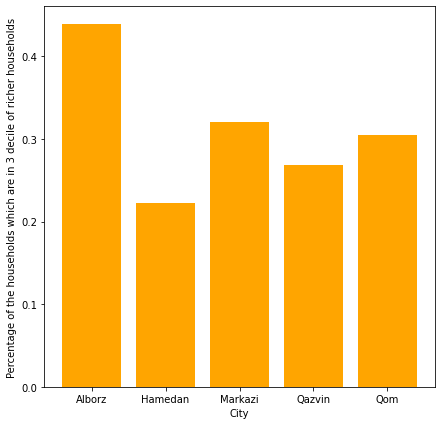

In [22]:
plt.figure(figsize=(7, 7))
plt.bar(range(len(COagg['Y', 'mean'])), COagg['Y', 'mean'], color= 'orange')
plt.xticks(ticks=range(len(COagg['Y', 'mean'])),labels= COagg['Y', 'mean'].index)
plt.xlabel('City')
plt.ylabel('Percentage of the households which are in 3 decile of richer households')

## Adress variable
### zip code of households

In [23]:
three_left_digit= df['Address']//100000000

In [24]:
three_left_digit.value_counts()

113    774
100    590
125    539
130    424
126    420
Name: Address, dtype: int64

In [25]:
df['C.O'].value_counts()

Hamedan    774
Markazi    590
Qom        539
Alborz     424
Qazvin     420
Name: C.O, dtype: int64

### So We undrestand that this feature shows where they live for example if we just look at three left digits it shows the city:C.O So in feature we shuld remove C.O Because this feature includes C.O

In [26]:
df['Address']= df['Address']//1000000

## Jens variable

In [27]:
df.loc[df['Jens']== 1, 'Jens']= 'Man'
df.loc[df['Jens']==2, 'Jens']= 'Woman'

In [28]:
J_C= df['Jens'].value_counts()
J_C

Man      2385
Woman     362
Name: Jens, dtype: int64

Text(0.5, 0, 'Sex')

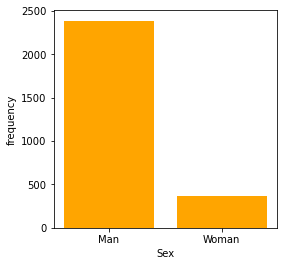

In [29]:
plt.figure(figsize=(4, 4))
plt.bar(range(2), J_C, color= 'orange')
plt.xticks(range(2), labels= J_C.index)
plt.ylabel('frequency')
plt.xlabel('Sex')

In [30]:
Jens_agg= df.groupby('Jens').aggregate([np.mean])
Jens_agg

,Address,MahMorajeh,Fasl,Sen,Savad,Tahsil.Mikonad,Madrak,Faaliat,Zanashoi,tedad.a,...,Hazine_Noshidani,Hazine_Pushak,Hazine_Tafrihat,Daramad_Yarane,Daramad_Azad,Daramad_Motefaraghe,Daramad_Mozd_Month,Daramad_Mozd_Year,Daramad_kol_Mounth,Y
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Jens,,,,,,,,,,,,,,,,,,,,,
Man,11715.432285,6.480503,2.483019,48.178616,1.100210,1.958062,3.219944,1.581132,1.044025,3.473795,...,247507.974843,1.155734e+06,304502.900210,1.733083e+07,6.672193e+07,6.946774e+07,1.021817e+07,1.221403e+08,2.297173e+07,0.324948
Woman,11755.903315,6.696133,2.535912,59.792818,1.472376,1.979058,2.329843,3.127072,2.063536,2.058011,...,104224.665746,7.488362e+05,212293.646409,1.044489e+07,9.051106e+06,1.052040e+08,3.901443e+06,4.571235e+07,1.420103e+07,0.135359


In [31]:
Jens_agg['Daramad_kol_Mounth', 'mean']

Jens
Man      2.297173e+07
Woman    1.420103e+07
Name: (Daramad_kol_Mounth, mean), dtype: float64

Text(0.5, 1.0, 'mean income Groupped by Sex')

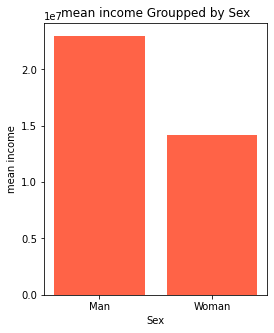

In [32]:
plt.figure(figsize=(4,5))
plt.bar(range(2), Jens_agg['Daramad_kol_Mounth', 'mean'], color='tomato')
plt.xticks(range(2), Jens_agg['Daramad_kol_Mounth', 'mean'].index)
plt.xlabel('Sex')
plt.ticklabel_format(axis='both', style='', scilimits=None, useOffset=None, useLocale=None, useMathText=None)
plt.ylabel('mean income')
plt.title('mean income Groupped by Sex')

This figure shows that Male-headed households mean of income is more than Female-headed households

## Sen(Age) Variable 

In [33]:
df['Sen'].value_counts()

40    92
33    89
36    87
34    83
48    77
      ..
92     2
95     1
91     1
89     1
20     1
Name: Sen, Length: 73, dtype: int64

Text(0, 0.5, 'frequency')

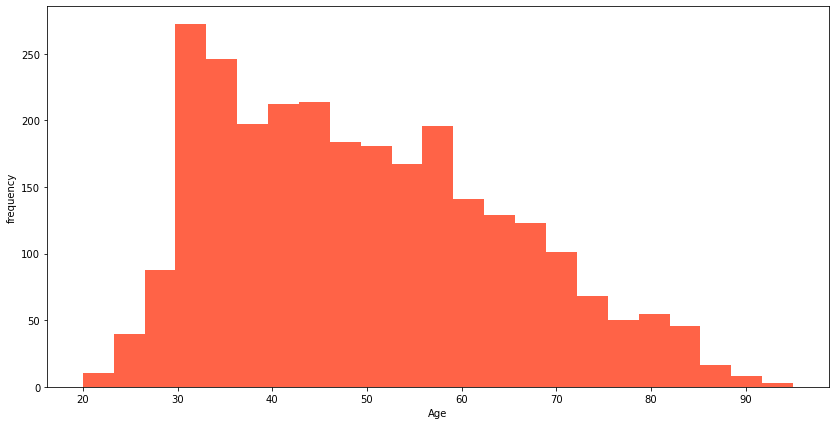

In [34]:
plt.figure(figsize= (14, 7))
plt.hist(df['Sen'], bins= 'auto', color= 'tomato')
plt.xlabel('Age')
plt.ylabel('frequency')

In [35]:
import seaborn as sns 

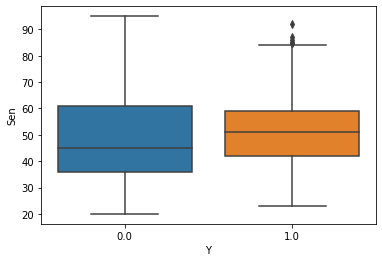

In [36]:
sns.boxplot(df['Y'], df['Sen'])

In [37]:
df['Sen'].quantile([0.2, 0.4, 0.6, 0.8])

0.2    35.0
0.4    43.0
0.6    53.0
0.8    64.0
Name: Sen, dtype: float64

In [38]:
df.loc[df['Sen']<=df['Sen'].quantile(.2), 'Sen1']= 28
df.loc[(df['Sen']>df['Sen'].quantile(.2))&(df['Sen']<=df['Sen'].quantile(.4)), 'Sen1']= 40
df.loc[(df['Sen']>df['Sen'].quantile(.4))&(df['Sen']<=df['Sen'].quantile(.6)), 'Sen1']= 48
df.loc[(df['Sen']>df['Sen'].quantile(.6))&(df['Sen']<=df['Sen'].quantile(.8)), 'Sen1']= 58
df.loc[df['Sen']>df['Sen'].quantile(.8), 'Sen1']= 78

In [39]:
Sen1_agg= df.groupby('Sen1').aggregate([np.mean])
Sen1_agg

,Address,MahMorajeh,Fasl,Sen,Savad,Tahsil.Mikonad,Madrak,Faaliat,Zanashoi,tedad.a,...,Hazine_Noshidani,Hazine_Pushak,Hazine_Tafrihat,Daramad_Yarane,Daramad_Azad,Daramad_Motefaraghe,Daramad_Mozd_Month,Daramad_Mozd_Year,Daramad_kol_Mounth,Y
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Sen1,,,,,,,,,,,,,,,,,,,,,
28.0,11781.360281,6.620387,2.497364,31.277680,1.012302,1.912811,3.670819,1.260105,1.082601,3.159930,...,172397.091388,1.244139e+06,211366.117750,1.489025e+07,4.947865e+07,1.943423e+07,1.045733e+07,1.272391e+08,1.758685e+07,0.163445
40.0,11805.641166,6.562842,2.506375,39.304189,1.030965,1.956767,3.387218,1.213115,1.109290,3.790528,...,221495.289617,1.392359e+06,362222.684882,1.885556e+07,7.059049e+07,2.229424e+07,1.291979e+07,1.545729e+08,2.219276e+07,0.258652
48.0,11736.374790,6.218487,2.332773,48.584874,1.053782,1.978686,2.932504,1.534454,1.117647,3.813445,...,272841.035294,1.355614e+06,266830.798319,1.965982e+07,8.014165e+07,7.251959e+07,1.221894e+07,1.417886e+08,2.617581e+07,0.435294
58.0,11742.064706,6.611765,2.547059,58.607843,1.194118,1.978102,2.725061,2.192157,1.231373,3.162745,...,311688.001961,9.023339e+05,296955.611765,1.598745e+07,6.008075e+07,1.280668e+08,7.708141e+06,9.424942e+07,2.486537e+07,0.409804
78.0,11527.587786,6.561069,2.587786,73.240458,1.486641,1.996283,2.672862,2.841603,1.372137,2.421756,...,166106.284351,5.503890e+05,331584.837786,1.228934e+07,3.277729e+07,1.374114e+08,2.935194e+06,3.465927e+07,1.809477e+07,0.230916


In [40]:
Sen1_agg['Y', 'mean']

Sen1
28.0    0.163445
40.0    0.258652
48.0    0.435294
58.0    0.409804
78.0    0.230916
Name: (Y, mean), dtype: float64

Text(0, 0.5, 'Percentage of the households which are in 3 decile of richer households Grouped by quantile Age')

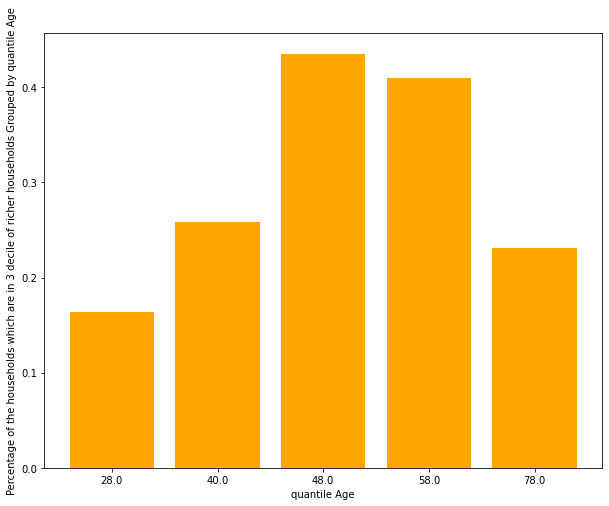

In [41]:
plt.figure(figsize= (10, 8))
plt.bar(range(len(Sen1_agg)), Sen1_agg['Y', 'mean'], color= 'orange')
plt.xticks(range(5), Sen1_agg.index)
plt.xlabel('quantile Age')
plt.ylabel('Percentage of the households which are in 3 decile of richer households Grouped by quantile Age')

## Madrak

In [42]:
df.loc[df['Madrak'].isna(), 'Madrak']= 'Bisavad'
df.loc[(df['Madrak']== 1)|(df['Madrak']== 9), 'Madrak']= 'Ebtedaii,Sayer,..'
df.loc[(df['Madrak']== 7)|(df['Madrak']== 8), 'Madrak']= 'Arshad& DR'
df.loc[(df['Madrak']== 3)|(df['Madrak']== 4), 'Madrak']= 'Dabirestan o pish'
df.loc[df['Madrak']== 2, 'Madrak']= 'Rahnamaii'
df.loc[df['Madrak']== 6, 'Madrak']= 'licans'
df.loc[df['Madrak']== 5, 'Madrak']= 'Kardani'

In [43]:
df['Madrak'].value_counts()

Ebtedaii,Sayer,..    733
Dabirestan o pish    610
Rahnamaii            490
Bisavad              410
licans               262
Arshad& DR           134
Kardani              108
Name: Madrak, dtype: int64

In [44]:
Madrak_agg= df.groupby('Madrak').aggregate([np.mean])
Madrak_agg

,Address,MahMorajeh,Fasl,Sen,Savad,Tahsil.Mikonad,Faaliat,Zanashoi,tedad.a,n.t.m,...,Hazine_Pushak,Hazine_Tafrihat,Daramad_Yarane,Daramad_Azad,Daramad_Motefaraghe,Daramad_Mozd_Month,Daramad_Mozd_Year,Daramad_kol_Mounth,Y,Sen1
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Madrak,,,,,,,,,,,,,,,,,,,,,
Arshad& DR,12104.940299,7.179104,2.582090,42.417910,1,1.582090,1.649254,1.029851,3.432836,2.514925,...,2.251978e+06,1.543015e+06,1.403709e+07,2.714179e+07,8.566675e+07,1.995551e+07,2.457773e+08,3.105191e+07,0.500000,41.910448
Bisavad,11547.763415,6.560976,2.534146,67.004878,2,NaN,2.678049,1.478049,2.570732,1.690244,...,3.590617e+05,1.280009e+05,1.215627e+07,2.504220e+07,7.127961e+07,4.548501e+06,5.544026e+07,1.365986e+07,0.141463,68.400000
Dabirestan o pish,11701.936066,6.465574,2.490164,44.522951,1,1.995082,1.521311,1.139344,3.368852,2.278689,...,1.492328e+06,3.031661e+05,1.721243e+07,7.149738e+07,7.809621e+07,9.912432e+06,1.185286e+08,2.377788e+07,0.331148,44.396721
"Ebtedaii,Sayer,..",11723.736698,6.611187,2.527967,53.025921,1,2.000000,1.869031,1.159618,3.392906,1.837653,...,7.884569e+05,1.882053e+05,1.766430e+07,6.495179e+07,7.604091e+07,7.324912e+06,8.251221e+07,2.009743e+07,0.259209,53.555252
Kardani,11875.453704,6.064815,2.388889,47.953704,1,1.972222,1.703704,1.148148,3.287037,1.879630,...,1.697871e+06,2.919172e+05,1.633366e+07,5.419537e+07,1.147798e+08,1.184576e+07,1.390671e+08,2.703132e+07,0.509259,48.000000
Rahnamaii,11704.722449,6.422449,2.475510,43.583673,1,1.997959,1.438776,1.083673,3.579592,2.308163,...,1.094388e+06,2.159394e+05,1.825200e+07,8.208220e+07,4.900985e+07,8.840619e+06,1.080650e+08,2.145075e+07,0.255102,43.020408
licans,11796.774809,6.244275,2.335878,41.347328,1,1.881679,1.515267,1.118321,3.301527,2.335878,...,1.414676e+06,3.191684e+05,1.562977e+07,4.277691e+07,8.882712e+07,1.609441e+07,1.963085e+08,2.862852e+07,0.484733,40.618321


In [45]:
Madrak_agg['Y', 'mean']

Madrak
Arshad& DR           0.500000
Bisavad              0.141463
Dabirestan o pish    0.331148
Ebtedaii,Sayer,..    0.259209
Kardani              0.509259
Rahnamaii            0.255102
licans               0.484733
Name: (Y, mean), dtype: float64

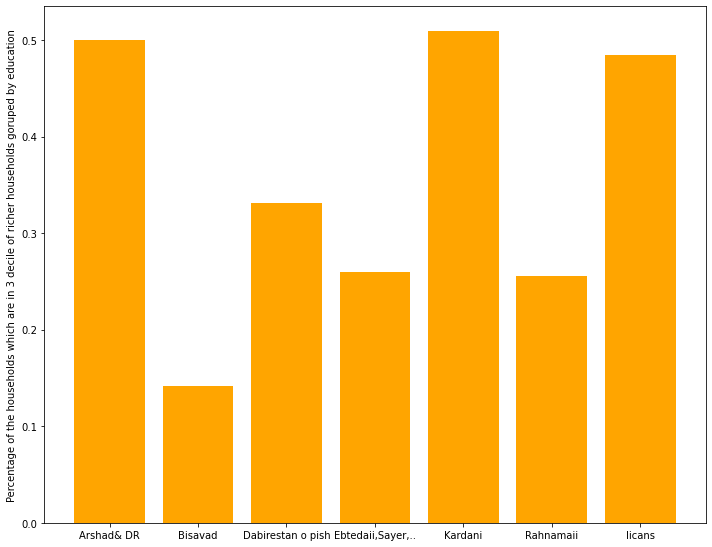

In [46]:
plt.figure(figsize=(10, 8))
plt.bar(range(len(Madrak_agg['Y', 'mean'])), Madrak_agg['Y', 'mean'], color= 'orange')
plt.xticks(range(len(Madrak_agg['Y', 'mean'])), Madrak_agg['Y', 'mean'].index)
plt.ylabel('Percentage of the households which are in 3 decile of richer households goruped by education')
plt.tight_layout()

## Faaliat Variable

In [47]:
df['Faaliat'].value_counts()

1    1748
3     853
5      62
2      54
6      29
4       1
Name: Faaliat, dtype: int64

1: shaqel
2: bikar jjoyaykar
3: daraie daramad bedune kar
4: mohassel
5: khanedar

In [48]:
df.loc[(df['Faaliat']== 1), 'Faaliat']= 'shaqel'
df.loc[(df['Faaliat']== 2)|(df['Faaliat']== 4)|(df['Faaliat']== 5), 'Faaliat']= 'bikarjoya|Mohasel|khane'
df.loc[(df['Faaliat']== 3)| (df['Faaliat']== 6), 'Faaliat']= 'daraie daramad bedune kar'

In [49]:
df['Faaliat'].value_counts()

shaqel                       1748
daraie daramad bedune kar     882
bikarjoya|Mohasel|khane       117
Name: Faaliat, dtype: int64

In [50]:
faa_agg=df.groupby('Faaliat').aggregate([np.mean])
faa_agg

,Address,MahMorajeh,Fasl,Sen,Savad,Tahsil.Mikonad,Zanashoi,tedad.a,n.t.m,t.o,...,Hazine_Pushak,Hazine_Tafrihat,Daramad_Yarane,Daramad_Azad,Daramad_Motefaraghe,Daramad_Mozd_Month,Daramad_Mozd_Year,Daramad_kol_Mounth,Y,Sen1
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Faaliat,,,,,,,,,,,,,,,,,,,,,
bikarjoya|Mohasel|khane,11661.803419,7.111111,2.735043,50.820513,1.290598,1.975904,1.589744,2.846154,2.333333,3.401709,...,4.113682e+05,81607.658120,1.443167e+07,1.019658e+07,5.437116e+07,4.662679e+06,8.036895e+07,1.328070e+07,0.111111,51.042735
daraie daramad bedune kar,11650.010204,6.507937,2.515873,62.132653,1.295918,1.924316,1.368481,2.794785,1.648526,3.714286,...,8.566712e+05,167222.980726,1.394663e+07,9.516894e+06,1.814665e+08,3.084560e+06,3.802482e+07,2.024624e+07,0.285714,63.412698
shaqel,11760.413616,6.469108,2.460526,43.366133,1.065789,1.972443,1.054920,3.565217,2.280320,3.554348,...,1.272191e+06,369594.366133,1.780643e+07,8.742643e+07,2.136698e+07,1.288131e+07,1.515511e+08,2.317925e+07,0.319794,42.907323


([<matplotlib.axis.XTick at 0xf0c96e5448>,
 [Text(0, 0, 'bikarjoya|Mohasel|khane'),
  Text(0, 0, 'daraie daramad bedune kar'),
  Text(0, 0, 'shaqel')])

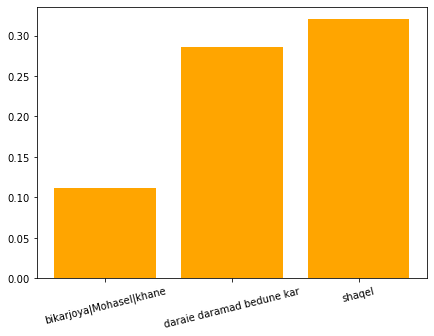

In [51]:
plt.figure(figsize= (7,5))
plt.bar(range(len(faa_agg)), faa_agg['Y', 'mean'], color= 'orange')
plt.xticks(range(3), faa_agg['Y', 'mean'].index, rotation= 14)
#plt.tight_layout()

## Zanashuii

In [52]:
df['Zanashoi'].value_counts()

1    2352
2     324
3      47
4      24
Name: Zanashoi, dtype: int64

In [53]:
df.loc[df['Zanashoi']== 1, 'Zanashoi']= 'Daraie Hamsar'
df.loc[df['Zanashoi']== 2, 'Zanashoi']= 'fot Hamsar'
df.loc[df['Zanashoi']== 3, 'Zanashoi']= 'talaq Hamsar'
df.loc[df['Zanashoi']== 4, 'Zanashoi']= 'single'

In [54]:
df['Zanashoi'].value_counts()

Daraie Hamsar    2352
fot Hamsar        324
talaq Hamsar       47
single             24
Name: Zanashoi, dtype: int64

In [55]:
Zanash_agg= df.groupby('Zanashoi').aggregate([np.mean])
Zanash_agg

,Address,MahMorajeh,Fasl,Sen,Savad,Tahsil.Mikonad,tedad.a,n.t.m,t.o,s.z,...,Hazine_Pushak,Hazine_Tafrihat,Daramad_Yarane,Daramad_Azad,Daramad_Motefaraghe,Daramad_Mozd_Month,Daramad_Mozd_Year,Daramad_kol_Mounth,Y,Sen1
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Zanashoi,,,,,,,,,,,,,,,,,,,,,
Daraie Hamsar,11720.070578,6.465561,2.480442,47.697704,1.094388,1.957746,3.512755,2.108844,3.625000,95.678146,...,1.154088e+06,303343.705357,1.751499e+07,6.375459e+07,6.892472e+07,1.029511e+07,1.229732e+08,2.276396e+07,0.325255,47.647109
fot Hamsar,11679.138889,6.907407,2.552469,65.138889,1.561728,1.985915,1.972222,1.793210,3.481481,91.043210,...,6.827738e+05,211451.462963,1.026559e+07,3.353395e+07,1.086817e+08,3.551021e+06,4.363383e+07,1.634292e+07,0.148148,66.592593
single,11878.166667,6.125000,2.333333,41.500000,1.083333,1.909091,1.500000,2.250000,3.375000,80.250000,...,2.181667e+06,465417.291667,6.370000e+06,3.179167e+07,6.302000e+07,1.204368e+07,1.118329e+08,1.775122e+07,0.291667,42.916667
talaq Hamsar,11962.127660,6.127660,2.617021,48.191489,1.085106,2.000000,1.978723,2.510638,3.234043,80.489362,...,8.406387e+05,211596.446809,9.380745e+06,1.764894e+07,1.048533e+08,2.743994e+06,3.825962e+07,1.417855e+07,0.085106,47.489362


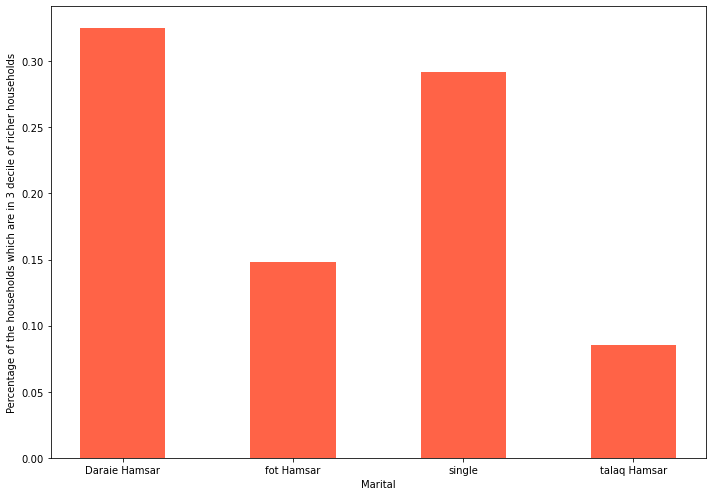

In [56]:
plt.figure(figsize= (10, 7))
plt.bar(range(len(Zanash_agg)), Zanash_agg['Y', 'mean'], color= 'tomato', width= .5)
plt.xticks(range(len(Zanash_agg)), Zanash_agg['Y', 'mean'].index)
plt.xlabel('Marital')
plt.ylabel('Percentage of the households which are in 3 decile of richer households')
plt.tight_layout()

In [57]:
martse= df.groupby(['Zanashoi', 'Jens']).aggregate([np.mean])
martse

Address MahMorajeh      Fasl        Sen     Savad  \
                             mean       mean      mean       mean      mean   
Zanashoi      Jens                                                            
Daraie Hamsar Man    11715.952155   6.473276  2.481897  47.838793  1.093966   
              Woman  12018.656250   5.906250  2.375000  37.468750  1.125000   
fot Hamsar    Man    11387.055556   7.500000  2.638889  70.361111  1.472222   
              Woman  11715.649306   6.833333  2.541667  64.486111  1.572917   
single        Man    12220.909091   6.363636  2.272727  36.818182  1.090909   
              Woman  11588.153846   5.923077  2.384615  45.461538  1.076923   
talaq Hamsar  Man    11996.277778   5.444444  2.444444  54.555556  1.166667   
              Woman  11940.931034   6.551724  2.724138  44.241379  1.034483   

                    Tahsil.Mikonad   tedad.a     n.t.m       t.o        s.z  \
                              mean      mean      mean      mean       mean   
Zanashoi      Jens                                                            
Daraie Hamsar Man         1.957184  3.519828  2.107759  3.626293  95.826724   
              Woman       2.000000  3.000000  2.187500  3.531250  84.906250   
fot Hamsar    Man         2.000000  2.166667  1.527778  3.638889  97.444444   
              Woman       1.983740  1.947917  1.826389  3.461806  90.243056   
single        Man         2.000000  1.181818  2.545455  2.727273  73.545455   
              Woman       1.833333  1.769231  2.000000  3.923077  85.923077   
talaq Hamsar  Man         2.000000  1.555556  2.000000  3.111111  85.611111   
              Woman       2.000000  2.241379  2.827586  3.310345  77.310345   

                     ... Hazine_Pushak Hazine_Tafrihat Daramad_Yarane  \
                     ...          mean            mean           mean   
Zanashoi      Jens   ...                                                
Daraie Hamsar Man    ...  1.163511e+06   306215.247414   1.756830e+07   
              Woman  ...  4.709379e+05    95156.906250   1.365000e+07   
fot Hamsar    Man    ...  7.502784e+05   258334.083333   1.083153e+07   
              Woman  ...  6.743357e+05   205591.135417   1.019484e+07   
single        Man    ...  1.796364e+06   298182.272727   4.963637e+06   
              Woman  ...  2.507693e+06   606923.846154   7.560000e+06   
talaq Hamsar  Man    ...  5.727783e+05   180000.611111   7.280000e+06   
              Woman  ...  1.006897e+06   231207.655172   1.068466e+07   

                     Daramad_Azad Daramad_Motefaraghe Daramad_Mozd_Month  \
                             mean                mean               mean   
Zanashoi      Jens                                                         
Daraie Hamsar Man    6.458094e+07        6.839796e+07       1.040737e+07   
              Woman  3.843751e+06        1.071150e+08       2.156251e+06   
fot Hamsar    Man    2.249444e+08        1.138718e+08       2.195371e+06   
              Woman  9.607640e+06        1.080330e+08       3.720477e+06   
single        Man    5.936364e+07        4.845455e+07       8.737879e+06   
              Woman  8.461539e+06        7.534462e+07       1.484090e+07   
talaq Hamsar  Man    3.072222e+07        1.313833e+08       2.781908e+06   
              Woman  9.534484e+06        8.838635e+07       2.720460e+06   

                    Daramad_Mozd_Year Daramad_kol_Mounth         Y       Sen1  
                                 mean               mean      mean       mean  
Zanashoi      Jens                                                             
Daraie Hamsar Man        1.243615e+08       2.290906e+07  0.328879  47.805172  
              Woman      2.231875e+07       1.224396e+07  0.062500  36.187500  
fot Hamsar    Man        2.681667e+07       3.137204e+07  0.166667  70.055556  
              Woman      4.573598e+07       1.446429e+07  0.145833  66.159722  
single        Man        1.076364e+08       1.836818e+07  0.272727  37.636364  
     

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

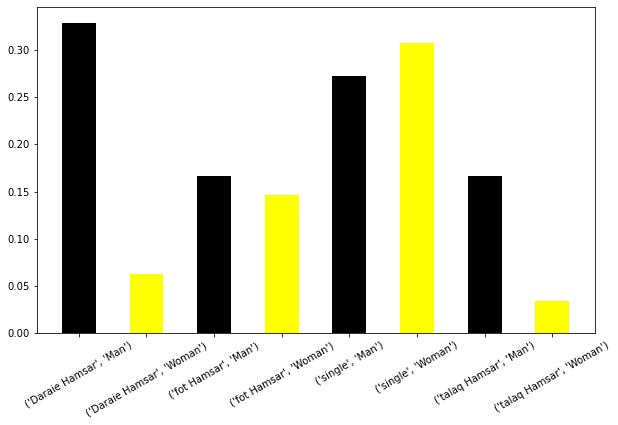

In [58]:
plt.figure(figsize= (10, 6))
plt.bar(range(len(martse['Y', 'mean'])), martse['Y', 'mean'], color=['black','yellow'], width= .5)
plt.xticks(range(len(martse['Y', 'mean'])), martse['Y', 'mean'].index, rotation= 30)
plt.tight_layout

## Tedad aza
## Fam_size:

In [59]:
df['tedad.a'].value_counts()

4     826
3     803
2     563
5     272
1     182
6      71
7      23
8       3
9       2
10      2
Name: tedad.a, dtype: int64

In [60]:
df.loc[df['tedad.a']>= 7, 'tedad.a']= 8

([<matplotlib.axis.XTick at 0xf0c99a6588>,
 [Text(0, 0, '4'),
  Text(0, 0, '3'),
  Text(0, 0, '2'),
  Text(0, 0, '5'),
  Text(0, 0, '1'),
  Text(0, 0, '6'),
  Text(0, 0, '8')])

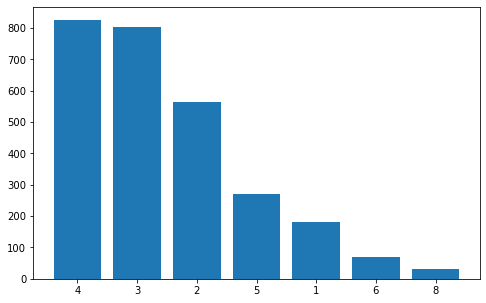

In [61]:
plt.figure(figsize= (8, 5))
plt.bar(range(len(df['tedad.a'].value_counts())), df['tedad.a'].value_counts())
plt.xticks(range(len(df['tedad.a'].value_counts())), df['tedad.a'].value_counts().index)

In [62]:
tedad_agg= df.groupby('tedad.a').aggregate([np.mean])
tedad_agg

,Address,MahMorajeh,Fasl,Sen,Savad,Tahsil.Mikonad,n.t.m,t.o,s.z,n.e,...,Hazine_Pushak,Hazine_Tafrihat,Daramad_Yarane,Daramad_Azad,Daramad_Motefaraghe,Daramad_Mozd_Month,Daramad_Mozd_Year,Daramad_kol_Mounth,Y,Sen1
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
tedad.a,,,,,,,,,,,,,,,,,,,,,
1,11661.604396,6.472527,2.631868,67.038462,1.604396,2.000000,1.972527,3.269231,83.785714,2.565934,...,3.888936e+05,37638.280220,5.292500e+06,5.019232e+06,9.868503e+07,1.420541e+06,1.318989e+07,1.018222e+07,0.038462,67.945055
2,11638.555950,6.577265,2.538188,55.476021,1.238011,1.962704,1.952043,3.575488,95.591474,2.467140,...,8.836862e+05,352180.232682,1.041166e+07,3.696412e+07,1.038415e+08,5.243479e+06,6.289772e+07,1.784292e+07,0.197158,56.383659
3,11707.112080,6.534247,2.471980,46.692403,1.083437,1.970109,2.206725,3.566625,94.229141,2.378580,...,1.084540e+06,288400.344956,1.529888e+07,7.515988e+07,7.002117e+07,9.898017e+06,1.211569e+08,2.346974e+07,0.323786,46.254047
4,11756.634383,6.423729,2.441889,45.668281,1.067797,1.958442,2.093220,3.611380,94.541162,2.432203,...,1.315636e+06,320804.386199,2.044360e+07,5.949142e+07,5.801091e+07,1.192921e+07,1.402767e+08,2.318522e+07,0.340194,45.702179
5,11741.735294,6.437500,2.481618,47.187500,1.077206,1.936255,1.926471,3.772059,99.485294,2.477941,...,1.443309e+06,294364.444853,2.464695e+07,9.014522e+07,5.803410e+07,1.292933e+07,1.551836e+08,2.733416e+07,0.430147,47.088235
6,12046.338028,6.957746,2.563380,50.028169,1.197183,1.877193,2.084507,3.929577,98.281690,2.746479,...,1.168733e+06,230845.591549,2.442901e+07,8.201409e+07,7.943563e+07,1.061941e+07,1.265014e+08,2.603167e+07,0.521127,50.478873
8,12039.700000,6.700000,2.433333,50.466667,1.266667,1.954545,2.733333,4.233333,112.666667,2.833333,...,8.683338e+05,164500.433333,2.267417e+07,2.827333e+07,5.905767e+07,1.665467e+07,1.897127e+08,2.497649e+07,0.366667,50.333333


Text(0, 0.5, 'Percentage of the households which are in 3 decile of richer households grouped by fam size')

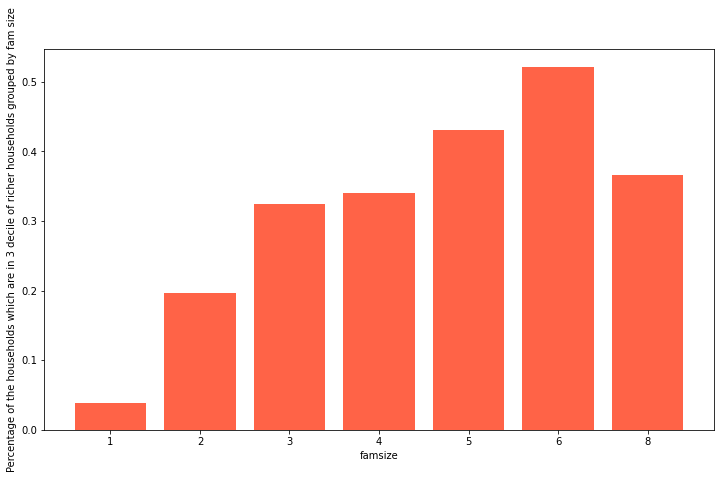

In [63]:
plt.figure(figsize= (12, 7))
plt.bar(range(len(tedad_agg)), tedad_agg['Y', 'mean'], color= 'tomato')
plt.xticks(range(len(tedad_agg)), tedad_agg.index)
plt.xlabel('famsize')
plt.ylabel('Percentage of the households which are in 3 decile of richer households grouped by fam size')

## ntm

In [64]:
df['n.t.m'].value_counts()

1    1754
3     445
4     243
6     239
2      42
5      17
7       7
Name: n.t.m, dtype: int64

In [65]:
df.loc[df['n.t.m']== 1, 'n.t.m']= 'Melki-Arse-Ayan'
df.loc[(df['n.t.m']== 2)|(df['n.t.m']== 5), 'n.t.m']= 'Khedmat&Melki-Ayan'
df.loc[df['n.t.m']== 3, 'n.t.m']= 'Ejari'
df.loc[df['n.t.m']== 4, 'n.t.m']= 'Rahn'
df.loc[(df['n.t.m']== 6)|(df['n.t.m']== 7), 'n.t.m']= 'Sayer&Raygan'

In [66]:
df['n.t.m'].value_counts()

Melki-Arse-Ayan       1754
Ejari                  445
Sayer&Raygan           246
Rahn                   243
Khedmat&Melki-Ayan      59
Name: n.t.m, dtype: int64

## t.o
## Number of rooms:

In [67]:
df['t.o'].value_counts()

4    1138
3    1091
2     217
5     208
6      58
7      22
8       7
9       3
1       3
Name: t.o, dtype: int64

In [68]:
df.loc[df['t.o']<=2, 't.o']= 2
df.loc[df['t.o']>=7, 't.o']= 7

## s.z

In [69]:
df['s.z'].describe()

count    2747.000000
mean       94.736804
std        36.495371
min         9.000000
25%        70.000000
50%        90.000000
75%       110.000000
max       345.000000
Name: s.z, dtype: float64

(array([  3.,   4.,   2.,  22.,  36.,  24., 162., 163.,  87., 370., 301.,
        142., 258., 418.,  23., 143., 208.,  14.,  74.,  47., 108.,   4.,
         18.,  14.,   5.,  22.,   2.,   1.,  34.,   2.,   1.,   6.,   4.,
          0.,   7.,   4.,   0.,   2.,   3.,   0.,   0.,   0.,   0.,   7.,
          0.,   0.,   1.,   0.,   0.,   1.]),
 array([  9.  ,  15.72,  22.44,  29.16,  35.88,  42.6 ,  49.32,  56.04,
         62.76,  69.48,  76.2 ,  82.92,  89.64,  96.36, 103.08, 109.8 ,
        116.52, 123.24, 129.96, 136.68, 143.4 , 150.12, 156.84, 163.56,
        170.28, 177.  , 183.72, 190.44, 197.16, 203.88, 210.6 , 217.32,
        224.04, 230.76, 237.48, 244.2 , 250.92, 257.64, 264.36, 271.08,
        277.8 , 284.52, 291.24, 297.96, 304.68, 311.4 , 318.12, 324.84,
        331.56, 338.28, 345.  ]),
 <a list of 50 Patch objects>)

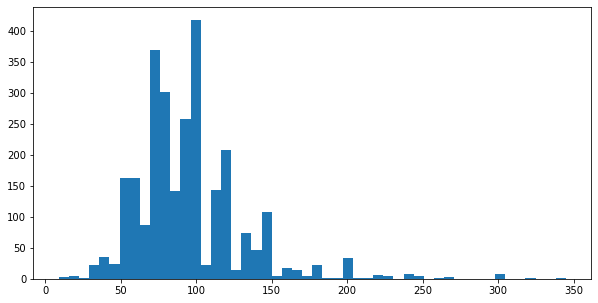

In [70]:
plt.figure(figsize=(10, 5))
plt.hist(df['s.z'], bins= 50)

## n.e

In [71]:
df['n.e'].value_counts()

3    1776
1     541
2     430
Name: n.e, dtype: int64

In [72]:
df.loc[df['n.e']==1 , 'n.e']= 'Felezi'
df.loc[df['n.e']==2 , 'n.e']= 'Beton-Arme'
df.loc[df['n.e']==3 , 'n.e']= 'sayer'

In [73]:
df.groupby('n.e').aggregate([np.mean])['Y', 'mean']

n.e
Beton-Arme    0.434884
Felezi        0.332717
sayer         0.257320
Name: (Y, mean), dtype: float64

## Oto

In [74]:
df.loc[df['oto'].isna(), 'oto']= 'oto nadarad'
df.loc[df['oto']== 1, 'oto']= 'oto darad'

In [75]:
df['oto'].value_counts()

oto darad      1398
oto nadarad    1349
Name: oto, dtype: int64

(0.0, 120000000.0)

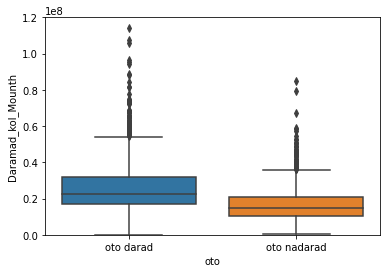

In [76]:
sns.boxplot(df['oto'], df['Daramad_kol_Mounth'])
plt.ylim(0, 120000000)

## Mo

In [77]:
df['mo'].value_counts()

1.0    441
Name: mo, dtype: int64

In [78]:
df['mo'].isna().value_counts()

True     2306
False     441
Name: mo, dtype: int64

In [79]:
df.loc[df['mo'].isna(), 'mo']= 'No Motorcycle'
df.loc[df['mo']==1, 'mo']= 'Have Motorcycle'

In [80]:
df['mo'].value_counts()

No Motorcycle      2306
Have Motorcycle     441
Name: mo, dtype: int64

## Do

In [81]:
df.loc[df['do'].isna(), 'do']= 'do nadarad'
df.loc[df['do']== 1, 'do']= 'do darad'

In [82]:
df['do'].value_counts()

do nadarad    2440
do darad       307
Name: do, dtype: int64

## radio

In [83]:
df.loc[df['radio'].isna(), 'radio']= 'dont have radio'
df.loc[df['radio']== 1, 'radio']= 'have radio'

In [84]:
df['radio'].value_counts()

dont have radio    2680
have radio           67
Name: radio, dtype: int64

## zabt

In [85]:
df.loc[df['zabt'].isna(), 'zabt']= 'dont have zabt'
df.loc[df['zabt']== 1, 'zabt']= 'have zabt'

In [86]:
df['zabt'].value_counts()

dont have zabt    2554
have zabt          193
Name: zabt, dtype: int64

## tv.s

In [87]:
df.loc[df['tv.s'].isna(), 'tv.s']= 'dont have tv.s'
df.loc[df['tv.s']== 1, 'tv.s']= 'have tv.s'

In [88]:
df['tv.s'].value_counts()

dont have tv.s    2729
have tv.s           18
Name: tv.s, dtype: int64

## tv.r

In [89]:
df.loc[df['tv.r'].isna(), 'tv.r']= 'dont have tv.r'
df.loc[df['tv.r']== 1, 'tv.r']= 'have tv.r'

In [90]:
df['tv.r'].value_counts()

have tv.r         2672
dont have tv.r      75
Name: tv.r, dtype: int64

## video

In [91]:
df.loc[df['video'].isna(), 'video']= 'dont have video'
df.loc[df['video']== 1, 'video']= 'have video'

In [92]:
df['video'].value_counts()

dont have video    2091
have video          656
Name: video, dtype: int64

## pc

In [93]:
df.loc[df['pc'].isna(), 'pc']= 'dont have pc'
df.loc[df['pc']== 1, 'pc']= 'have pc'

In [94]:
df['pc'].value_counts()

dont have pc    2030
have pc          717
Name: pc, dtype: int64

## mobile

In [95]:
df.loc[df['mobile'].isna(), 'mobile']= 'dont have mobile'
df.loc[df['mobile']== 1, 'mobile']= 'have mobile'

In [96]:
df['mobile'].value_counts()

have mobile         2620
dont have mobile     127
Name: mobile, dtype: int64

## freeizer

In [97]:
df.loc[df['freeizer'].isna(), 'freeizer']= 'dont have freeizer'
df.loc[df['freeizer']== 1, 'freeizer']= 'have freeizer'

In [98]:
df['freeizer'].value_counts()

dont have freeizer    2194
have freeizer          553
Name: freeizer, dtype: int64

## yakhchal

In [99]:
df.loc[df['yakhchal'].isna(), 'yakhchal']= 'dont have yakhchal'
df.loc[df['yakhchal']== 1, 'yakhchal']= 'have yakhchal'

In [100]:
df['yakhchal'].value_counts()

dont have yakhchal    1982
have yakhchal          765
Name: yakhchal, dtype: int64

## yakhchal.f

In [101]:
df.loc[df['yakhchal.f'].isna(), 'yakhchal.f']= 'dont have yakhchal.f'
df.loc[df['yakhchal.f']== 1, 'yakhchal.f']= 'have yakhchal.f'

In [102]:
df['yakhchal.f'].value_counts()

have yakhchal.f         2004
dont have yakhchal.f     743
Name: yakhchal.f, dtype: int64

## gaz

In [103]:
df.loc[df['gaz'].isna(), 'gaz']= 'dont have gaz'
df.loc[df['gaz']== 1, 'gaz']= 'have gaz'

In [104]:
df['gaz'].value_counts()

have gaz         2731
dont have gaz      16
Name: gaz, dtype: int64

## gaz.l

In [105]:
df.loc[df['gaz.l'].isna(), 'gaz.l']= 'dont have gaz.l'
df.loc[df['gaz.l']== 1, 'gaz.l']= 'have gaz.l'

In [106]:
df['gaz.l'].value_counts()

have gaz.l         2737
dont have gaz.l      10
Name: gaz.l, dtype: int64

## jaro.b

In [107]:
df.loc[df['jaro.b'].isna(), 'jaro.b']= 'dont have jaro.b'
df.loc[df['jaro.b']== 1, 'jaro.b']= 'have jaro.b'

In [108]:
df['jaro.b'].value_counts()

have jaro.b         2555
dont have jaro.b     192
Name: jaro.b, dtype: int64

## m.lebas

In [109]:
df.loc[df['m.lebas'].isna(), 'm.lebas']= 'dont have m.lebas'
df.loc[df['m.lebas']== 1, 'm.lebas']= 'have m.lebas'

In [110]:
df['m.lebas'].value_counts()

have m.lebas         2417
dont have m.lebas     330
Name: m.lebas, dtype: int64

## charkh.kh

In [111]:
df.loc[df['charkh.kh'].isna(), 'charkh.kh']= 'dont have charkh.kh'
df.loc[df['charkh.kh']== 1, 'charkh.kh']= 'have charkh.kh'

In [112]:
df['charkh.kh'].value_counts()

dont have charkh.kh    1481
have charkh.kh         1266
Name: charkh.kh, dtype: int64

## panke

In [113]:
df.loc[df['panke'].isna(), 'panke']= 'dont have panke'
df.loc[df['panke']== 1, 'panke']= 'have panke'

In [114]:
df['panke'].value_counts()

dont have panke    2119
have panke          628
Name: panke, dtype: int64

## cooler.a

In [115]:
df.loc[df['cooler.a'].isna(), 'cooler.a']= 'dont have cooler.a'
df.loc[df['cooler.a']== 1, 'cooler.a']= 'have cooler.a'

In [116]:
df['cooler.a'].value_counts()

dont have cooler.a    2689
have cooler.a           58
Name: cooler.a, dtype: int64

## cooler.g

In [117]:
df.loc[df['cooler.g'].isna(), 'cooler.g']= 'dont have cooler.g'
df.loc[df['cooler.g']== 1, 'cooler.g']= 'have cooler.g'

In [118]:
df['cooler.g'].value_counts()

dont have cooler.g    2742
have cooler.g            5
Name: cooler.g, dtype: int64

## m.zarf

In [119]:
df.loc[df['m.zarf'].isna(), 'm.zarf']= 'dont have m.zarf'
df.loc[df['m.zarf']== 1, 'm.zarf']= 'have m.zarf'

In [120]:
df['m.zarf'].value_counts()

dont have m.zarf    2601
have m.zarf          146
Name: m.zarf, dtype: int64

## microfer

In [121]:
df.loc[df['microfer'].isna(), 'microfer']= 'dont have microfer'
df.loc[df['microfer']== 1, 'microfer']= 'have microfer'

In [122]:
df['microfer'].value_counts()

dont have microfer    2529
have microfer          218
Name: microfer, dtype: int64

## bargh

In [123]:
df.loc[df['bargh'].isna(), 'bargh']= 'dont have bargh'
df.loc[df['bargh']== 1, 'bargh']= 'have bargh'

In [124]:
df['bargh'].value_counts()

have bargh    2747
Name: bargh, dtype: int64

## tel

In [125]:
df.loc[df['tel'].isna(), 'tel']= 'dont have tel'
df.loc[df['tel']== 1, 'tel']= 'have tel'

In [126]:
df['tel'].value_counts()

have tel         2046
dont have tel     701
Name: tel, dtype: int64

## internet

In [127]:
df.loc[df['internet'].isna(), 'internet']= 'dont have internet'
df.loc[df['internet']== 1, 'internet']= 'have internet'

In [128]:
df['internet'].value_counts()

have internet         1462
dont have internet    1285
Name: internet, dtype: int64

## hamam

In [129]:
df.loc[df['hamam'].isna(), 'hamam']= 'dont have hamam'
df.loc[df['hamam']== 1, 'hamam']= 'have hamam'

In [130]:
df['hamam'].value_counts()

have hamam         2736
dont have hamam      11
Name: hamam, dtype: int64

## ashpazkhane

In [131]:
df.loc[df['ashpazkhane'].isna(), 'ashpazkhane']= 'dont have ashpazkhane'
df.loc[df['ashpazkhane']== 1, 'ashpazkhane']= 'have ashpazkhane'

In [132]:
df['gaz'].value_counts()

have gaz         2731
dont have gaz      16
Name: gaz, dtype: int64

## cooler.a.s

In [133]:
df.loc[df['cooler.a.s'].isna(), 'cooler.a.s']= 'dont have cooler.a.s'
df.loc[df['cooler.a.s']== 1, 'cooler.a.s']= 'have cooler.a.s'

In [134]:
df['cooler.a.s'].value_counts()

have cooler.a.s         2139
dont have cooler.a.s     608
Name: cooler.a.s, dtype: int64

## broodat.m

In [135]:
df.loc[df['broodat.m'].isna(), 'broodat.m']= 'dont have broodat.m'
df.loc[df['broodat.m']== 1, 'broodat.m']= 'have broodat.m'

In [136]:
df['broodat.m'].value_counts()

dont have broodat.m    2737
have broodat.m           10
Name: broodat.m, dtype: int64

## hararat.m

In [137]:
df.loc[df['hararat.m'].isna(), 'hararat.m']= 'dont have hararat.m'
df.loc[df['hararat.m']== 1, 'hararat.m']= 'have hararat.m'

In [138]:
df['hararat.m'].value_counts()

dont have hararat.m    2716
have hararat.m           31
Name: hararat.m, dtype: int64

## package

In [139]:
df.loc[df['package'].isna(), 'package']= 'dont have package'
df.loc[df['package']== 1, 'package']= 'have package'

In [140]:
df['package'].value_counts()

dont have package    2503
have package          244
Name: package, dtype: int64

## cooler.g.s

In [141]:
df.loc[df['cooler.g.s'].isna(), 'cooler.g.s']= 'dont have cooler.g.s'
df.loc[df['cooler.g.s']== 1, 'cooler.g.s']= 'have cooler.g.s'

In [142]:
df['cooler.g.s'].value_counts()

dont have cooler.g.s    2586
have cooler.g.s          161
Name: cooler.g.s, dtype: int64

## fazelab

In [143]:
df.loc[df['fazelab'].isna(), 'fazelab']= 'dont have fazelab'
df.loc[df['fazelab']== 1, 'fazelab']= 'have fazelab'

In [144]:
df['fazelab'].value_counts()

dont have fazelab    1696
have fazelab         1051
Name: fazelab, dtype: int64

## sookht.p

In [145]:
df['sookht.p'].value_counts()

4    2735
3      11
5       1
Name: sookht.p, dtype: int64

In [146]:
df['sookht.g'].value_counts()

14    2735
11       8
15       2
13       2
Name: sookht.g, dtype: int64

In [147]:
df['sookht.ab'].value_counts()

24    2734
23       7
21       3
29       1
25       1
26       1
Name: sookht.ab, dtype: int64

In [148]:
df['Rahn'].value_counts()

1             2087
100000000       83
50000000        68
30000000        49
150000000       42
              ... 
230000000        1
2000000000       1
100000           1
3000000          1
320000000        1
Name: Rahn, Length: 67, dtype: int64

## Heat Map

In [149]:
df_numeric= df[['Sen', 'tedad.a', 't.o', 's.z', 'Hazine_Behdashti', 'Hazine_Ertebatat', 'Hazine_Ghazayeamade',
    'Hazine_Hamlonaghl', 'Hazine_kalavakhadamat', 'Hazine_Khorakivadokhani', 'Hazine_lavazemkhanegi',
    'Rahn', 'Hazine_Maskan', 'Hazine_Noshidani', 'Hazine_Pushak', 'Hazine_Tafrihat']]

(18.0, -0.001)

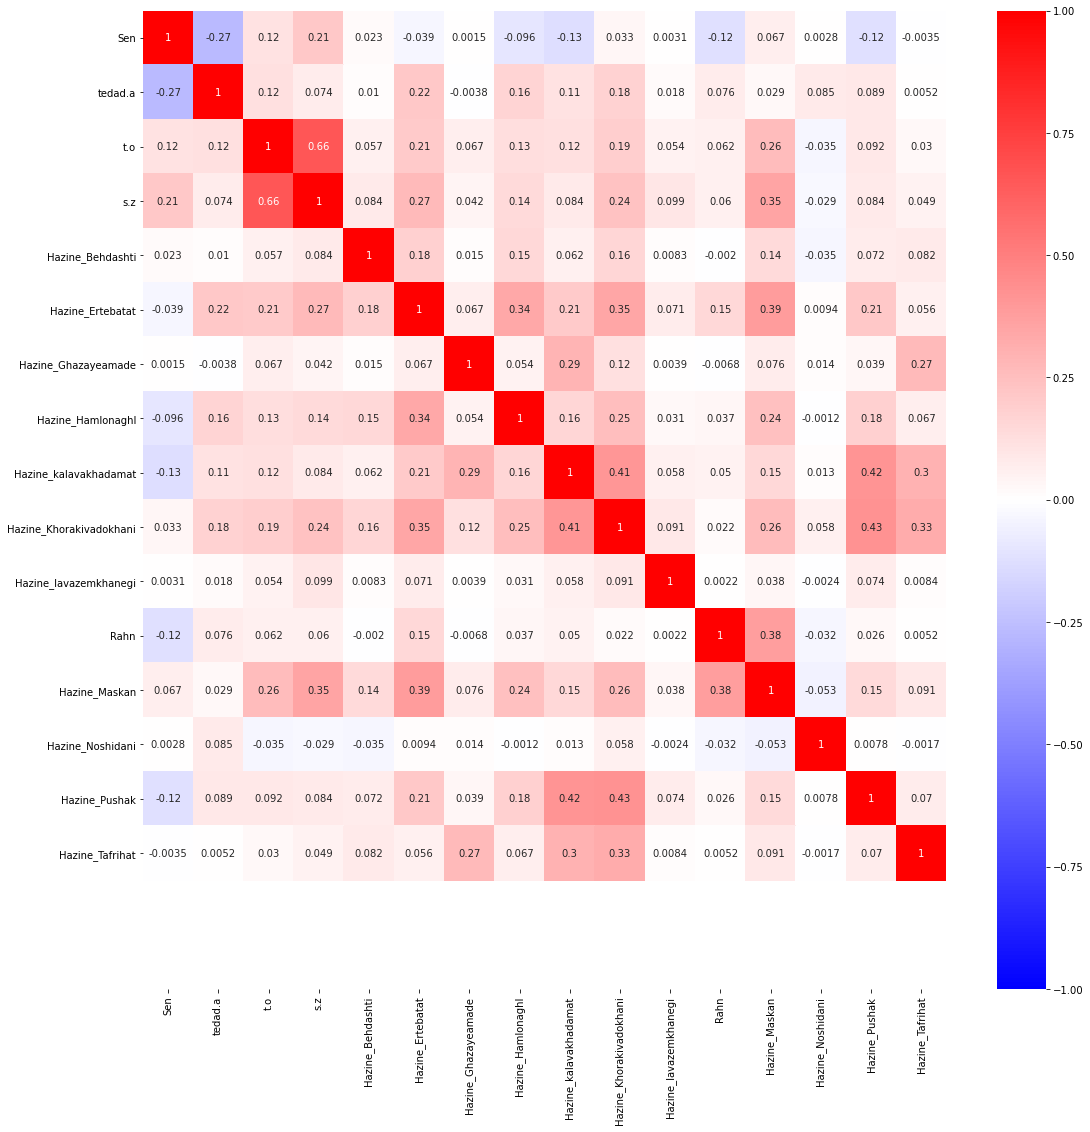

In [150]:
plt.figure(figsize= (18, 18))
sns.heatmap(df_numeric.corr(), annot = True, vmin=-1, vmax=1, center= 0, 
           cmap= 'bwr')
plt.ylim(18,-.001)


In [151]:
#df['log_Rahn']= np.log10(df['Rahn'])
#df['log_Hazine_Tafrihat']= np.log10(df['Hazine_Tafrihat'])
#df['log_Hazine_Pushak']= np.log10(df['Hazine_Pushak'])
#df['log_Hazine_Noshidani']= np.log10(df['Hazine_Noshidani'])
#df['log_Hazine_Maskan']= np.log10(df['Hazine_Maskan'])
#df['log_Hazine_lavazemkhanegi']= np.log10(df['Hazine_lavazemkhanegi'])
#df['log_Hazine_Khorakivadokhani']= np.log10(df['Hazine_Khorakivadokhani'])
#df['log_Hazine_kalavakhadamat']= np.log10(df['Hazine_kalavakhadamat'])
#df['log_Hazine_Hamlonaghl']= np.log10(df['Hazine_Hamlonaghl'])
#df['log_Hazine_Ghazayeamade']= np.log10(df['Hazine_Ghazayeamade'])
#df['log_Hazine_Ertebatat']= np.log10(df['Hazine_Ertebatat'])
#df['log_Hazine_Behdashti']= np.log10(df['Hazine_Behdashti'])

### drop useless features:

In [152]:
print(df.shape)
df= df.drop(columns= ['C.O', 'MahMorajeh', 'Fasl', 'Sen', 'Savad', 'Tahsil.Mikonad', 'm.o.b', 'tv.s', 'tv.r', 'cooler.a', 'cooler.g',
                'ab.l', 'bargh', 'gaz.l', 'hararat.m', 'sookht.p', 'sookht.g', 'sookht.ab', 'hamam', 'ashpazkhane', 'gaz', 'broodat.m'])
print(df.shape)

(2747, 75)
(2747, 53)


#### I will try all algorithms one time on hazine ha with log and the other time without log:

In [153]:
df_Asli= pd.DataFrame.copy(df)
#df_log = pd.DataFrame.copy(df)

In [154]:
#df_Asli= df_Asli.drop(columns= ['log_Rahn', 'log_Hazine_Tafrihat', 'log_Hazine_Pushak', 'log_Hazine_Noshidani', 'log_Hazine_Maskan',
#                                'log_Hazine_lavazemkhanegi', 'log_Hazine_Khorakivadokhani', 'log_Hazine_kalavakhadamat', 
#                                'log_Hazine_Hamlonaghl', 'log_Hazine_Ghazayeamade', 'log_Hazine_Ertebatat', 'log_Hazine_Behdashti'])

In [155]:
#df_log= df_log.drop(columns= ['Rahn', 'Hazine_Tafrihat', 'Hazine_Pushak', 'Hazine_Noshidani', 'Hazine_Maskan',
#                                'Hazine_lavazemkhanegi', 'Hazine_Khorakivadokhani', 'Hazine_kalavakhadamat', 
#                                'Hazine_Hamlonaghl', 'Hazine_Ghazayeamade', 'Hazine_Ertebatat', 'Hazine_Behdashti'])

# Spliting Data:

In [156]:
Y= df_Asli['Y']
x= df_Asli.drop(columns=['Daramad_Yarane', 'Daramad_Azad', 'Daramad_Motefaraghe', 'Daramad_Mozd_Month', 'Daramad_Mozd_Year',
                    'Daramad_kol_Mounth', 'Y'])

In [157]:
df_Asli= df_Asli.drop(columns=['Daramad_Yarane', 'Daramad_Azad', 'Daramad_Motefaraghe', 'Daramad_Mozd_Month', 'Daramad_Mozd_Year',
                    'Daramad_kol_Mounth', 'Y'])

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [159]:
x_trainval, x_test, Y_trainval, Y_test = train_test_split(x, Y, random_state=11, stratify= Y)
x_train, x_val, Y_train, Y_val= train_test_split(x_trainval, Y_trainval, stratify= Y_trainval,random_state=11)

# Preprocessing

Preprocessing: Standard scaler on numeric features and one hoteEncode fore categorical and Target encoder for zip code

In [160]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer

In [161]:
is_cat= df_Asli.dtypes== object
is_cat
categories= is_cat[is_cat== True].index
df_Asli['Address'] = df_Asli['Address'].astype(str)
is_cat= df_Asli.dtypes== object
num= is_cat[is_cat== False].index
print(num)
print(categories)

Index(['tedad.a', 't.o', 's.z', 'Hazine_Behdashti', 'Hazine_Ertebatat',
       'Hazine_Ghazayeamade', 'Hazine_Hamlonaghl', 'Hazine_kalavakhadamat',
       'Hazine_Khorakivadokhani', 'Hazine_lavazemkhanegi', 'Rahn',
       'Hazine_Maskan', 'Hazine_Noshidani', 'Hazine_Pushak', 'Hazine_Tafrihat',
       'Sen1'],
      dtype='object')
Index(['Jens', 'Madrak', 'Faaliat', 'Zanashoi', 'n.t.m', 'n.e', 'oto', 'mo',
       'do', 'radio', 'zabt', 'video', 'pc', 'mobile', 'freeizer', 'yakhchal',
       'yakhchal.f', 'jaro.b', 'm.lebas', 'charkh.kh', 'panke', 'm.zarf',
       'microfer', 'tel', 'internet', 'cooler.a.s', 'package', 'cooler.g.s',
       'fazelab'],
      dtype='object')


In [162]:
categorical_preprocess= Pipeline([
    ('onehot', OneHotEncoder(handle_unknown= 'ignore'))
])

numeric_preprocess= Pipeline([
    ('power', PowerTransformer(method= 'box-cox')),
    ('scaler', StandardScaler())
])

zip_preprocess= Pipeline([
    ('target', TargetEncoder())
])

preprocess= ColumnTransformer([
    ('cat', categorical_preprocess, categories),
    ('zip', zip_preprocess, ['Address']),
    ('numeric', numeric_preprocess, num)
    
])

In [163]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# KNN

In [164]:
from sklearn.neighbors import KNeighborsClassifier

In [165]:
pipe= Pipeline([
    ('prep', preprocess),
    ('model', KNeighborsClassifier())
])

In [166]:
from sklearn.metrics import confusion_matrix

In [167]:
neighbors= np.arange(1, 40, 2)

In [168]:
for i in neighbors:
    model = Pipeline([
    ('prepro', preprocess),
    ('classifire', KNeighborsClassifier(n_neighbors= i))])
    model.fit(x_train, Y_train)
 #   print('train-set for %i neighbor(s) is:  %0.4f'%(i,knn.score(x_train, Y_train)))
    print('val-set for %i neighbor(s) is:  %0.4f'%(i,model.score(x_val, Y_val)))

val-set for 1 neighbor(s) is:  0.7107
val-set for 3 neighbor(s) is:  0.7301
val-set for 5 neighbor(s) is:  0.7650
val-set for 7 neighbor(s) is:  0.7689
val-set for 9 neighbor(s) is:  0.7689
val-set for 11 neighbor(s) is:  0.7825
val-set for 13 neighbor(s) is:  0.7709
val-set for 15 neighbor(s) is:  0.7748
val-set for 17 neighbor(s) is:  0.7806
val-set for 19 neighbor(s) is:  0.7709
val-set for 21 neighbor(s) is:  0.7709
val-set for 23 neighbor(s) is:  0.7670
val-set for 25 neighbor(s) is:  0.7689
val-set for 27 neighbor(s) is:  0.7767
val-set for 29 neighbor(s) is:  0.7767
val-set for 31 neighbor(s) is:  0.7767
val-set for 33 neighbor(s) is:  0.7786
val-set for 35 neighbor(s) is:  0.7767
val-set for 37 neighbor(s) is:  0.7786
val-set for 39 neighbor(s) is:  0.7786


In [169]:
knn_train_val = Pipeline([
    ('preprocess', preprocess),
    ('classifier', KNeighborsClassifier(n_neighbors= 11))
])
knn_train_val.fit(x_train, Y_train)
knn_train_val.score(x_val, Y_val)

0.7825242718446602

In [170]:
# 0.7902912621359224

## Grid Search cv

In [171]:
## scince in this pronlem it is more important to find postive class so our metric is average precision

In [172]:
from sklearn.preprocessing import MinMaxScaler

In [173]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [174]:
pipe = Pipeline((('prep', preprocess), ('knn', KNeighborsClassifier())))

In [175]:
param= {'prep__numeric__scaler': [StandardScaler(), MinMaxScaler()],
        'knn__n_neighbors': np.arange(2, 50, 2)}

In [176]:
grid_knn= GridSearchCV(pipe, param_grid= param, cv=5, return_train_score= True,
                      scoring={'AP': "average_precision", "ac": "accuracy"},
                        refit= "AP", verbose= 1, n_jobs= 7)

In [177]:
grid_knn.fit(x_trainval, Y_trainval)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    8.5s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:   33.1s
[Parallel(n_jobs=7)]: Done 240 out of 240 | elapsed:   42.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=(('prep',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('onehot',
                                                                                          OneHotEncoder(categories='auto',
                                                                                                        drop=None,
                                               

In [178]:
grid_knn.best_score_

0.6323551472545038

In [179]:
# 0.7674757281553398

In [180]:
grid_knn.best_params_

{'knn__n_neighbors': 36,
 'prep__numeric__scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [181]:
grid_knn_df= pd.DataFrame(grid_knn.cv_results_)

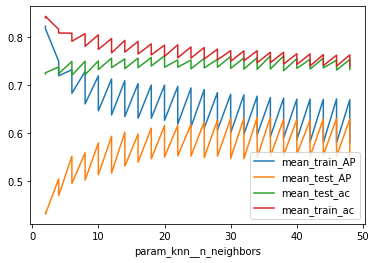

In [182]:
a= grid_knn_df.plot("param_knn__n_neighbors", "mean_train_AP")
b= grid_knn_df.plot("param_knn__n_neighbors", "mean_test_AP", ax= plt.gca())
c= grid_knn_df.plot("param_knn__n_neighbors", "mean_test_ac", ax= plt.gca())
d= grid_knn_df.plot("param_knn__n_neighbors", "mean_train_ac", ax= plt.gca())

# Logestic regression

In [183]:
from sklearn.linear_model import LogisticRegression

In [184]:
pipe= Pipeline([
    ('prep', preprocess),
    ('model', LogisticRegression())
])

In [185]:
params= {'model__C': np.logspace(-3, 0, 50)#,
         #'prep__numeric__scaler': [StandardScaler(), MinMaxScaler()]
        }
grid_Logestic= GridSearchCV(pipe, param_grid= params,
                            scoring={'AP': "average_precision", "ac": "accuracy"},
                            refit= "AP", verbose= 1, n_jobs= 7,
                            return_train_score= True, cv= 5)
grid_Logestic.fit(x_trainval, Y_trainval)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    2.7s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:   12.8s
[Parallel(n_jobs=7)]: Done 250 out of 250 | elapsed:   16.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('prep',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('onehot',
                                                                                          OneHotEncoder(categories='auto',
                                                                                                        drop=None,
                                               

In [186]:
grid_Logestic.best_score_

0.6885397143049587

In [187]:
#0.7713592233009708

In [188]:
grid_Logestic.best_params_

{'model__C': 0.029470517025518096}

In [189]:
grid_logestic_df= pd.DataFrame(grid_Logestic.cv_results_)

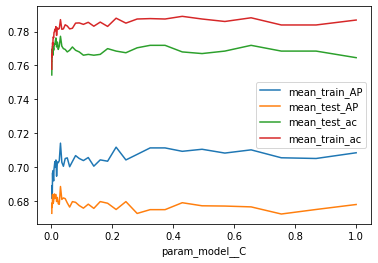

In [190]:
a= grid_logestic_df.plot("param_model__C", "mean_train_AP")
b= grid_logestic_df.plot("param_model__C", "mean_test_AP", ax= plt.gca())
c= grid_logestic_df.plot("param_model__C", "mean_test_ac", ax= plt.gca())
d= grid_logestic_df.plot("param_model__C", "mean_train_ac", ax= plt.gca())

# SVM

In [191]:
from sklearn.svm import LinearSVC

In [192]:
categorical_preprocess= Pipeline([
    ('cat', OneHotEncoder(handle_unknown= 'ignore'))
])

numeric_preprocess= Pipeline([
    ('power', PowerTransformer(method= 'box-cox')),
    ('scaler', StandardScaler())
])

zip_preprocess= Pipeline([
    ('zip', TargetEncoder())
])

preprocess_svm= ColumnTransformer([
    ('categircal', categorical_preprocess, categories),
    ('numeric', numeric_preprocess, num)
    
])



pipe= Pipeline([
    ('prep', preprocess_svm),
    ('model', LinearSVC())
])



In [193]:
params= {'model__C': np.logspace(-4, -2, 40)#,
         #'prep__numeric__scaler': [StandardScaler(), MinMaxScaler()]
        }
grid_svm= GridSearchCV(pipe, param_grid= params,
                       scoring={'AP': "average_precision", "ac": "accuracy"},
                       refit= "AP", verbose= 1, n_jobs= 7,
                       return_train_score= True, cv= 5)
grid_svm.fit(x_trainval, Y_trainval)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    2.1s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:   10.3s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:   11.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('prep',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('categircal',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('cat',
                                                                                          OneHotEncoder(categories='auto',
                                                                                                        drop=None,
                                           

In [194]:
grid_svm.best_score_

0.6903273052051265

In [195]:
#0.7713592233009708

In [196]:
grid_svm.best_params_

{'model__C': 0.0017012542798525892}

In [197]:
grid_svm_df= pd.DataFrame(grid_svm.cv_results_)

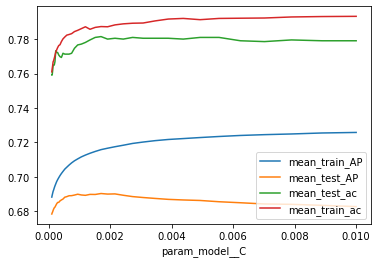

In [198]:
a= grid_svm_df.plot("param_model__C", "mean_train_AP")
b= grid_svm_df.plot("param_model__C", "mean_test_AP", ax= plt.gca())
c= grid_svm_df.plot("param_model__C", "mean_test_ac", ax= plt.gca())
d= grid_svm_df.plot("param_model__C", "mean_train_ac", ax= plt.gca())

# Kernel SVM

In [199]:
from sklearn.svm import SVC

In [200]:
pipe= Pipeline([
    ('prep', preprocess),
    ('model', SVC(kernel='rbf', probability= True))
])

In [201]:
params= {'model__C': np.logspace(1, 2, 6),
         'model__gamma': np.logspace(-4, -2, 6)/x_trainval.shape[1]
        # 'model__C': np.logspace(-3, 2, 10),
       #  'model__gamma': np.logspace(-3, 2, 10)/x_trainval.shape[1]
         #'prep__numeric__scaler': [StandardScaler(), MinMaxScaler()]
        }
kernel_svm= GridSearchCV(pipe, param_grid= params,
                         scoring={'AP': "average_precision", "ac": "accuracy"},
                         refit= "AP", verbose= 1, n_jobs= 7,
                         return_train_score= True, cv= 5)
kernel_svm.fit(x_trainval, Y_trainval)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:   19.4s
[Parallel(n_jobs=7)]: Done 180 out of 180 | elapsed:  1.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('prep',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('onehot',
                                                                                          OneHotEncoder(categories='auto',
                                                                                                        drop=None,
                                               

In [202]:
kernel_svm.best_score_

0.6816354241385476

In [203]:
kernelsvm= kernel_svm.best_estimator_

In [204]:
kernelsvm.predict_proba

<function sklearn.pipeline.Pipeline.predict_proba(self, X)>

In [205]:
kernel_svm.best_params_

{'model__C': 63.09573444801933, 'model__gamma': 8.654503707684725e-05}

# Decision Tree

In [206]:
from sklearn.tree import DecisionTreeClassifier
preprocess_tree= ColumnTransformer([
    ('one-hot', categorical_preprocess, categories),
    ('zip', zip_preprocess, ['Address']),
    ('nums', 'passthrough', num)
    
])
pipe= Pipeline([
    ('prep', preprocess_tree),
    ('model', DecisionTreeClassifier(random_state= 15))
])

#tree.fit(x_train, Y_train)

In [207]:
params= {'model__max_depth': range(1, 7),
         'model__max_leaf_nodes': range(5, 10)
        }

In [208]:
grid_tree= GridSearchCV(pipe, param_grid= params, cv= 10,
                        scoring={'AP': "average_precision", "ac": "accuracy"},
                        refit= "AP", verbose= 1, n_jobs= 7,                       
                        return_train_score= True)
grid_tree.fit(x_trainval, Y_trainval)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    1.5s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    7.2s
[Parallel(n_jobs=7)]: Done 300 out of 300 | elapsed:   11.4s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('prep',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('one-hot',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('cat',
                                                                                          OneHotEncoder(categories='auto',
                                                                                                        drop=None,
                                             

In [209]:
grid_tree.best_params_

{'model__max_depth': 3, 'model__max_leaf_nodes': 8}

In [210]:
grid_tree.best_score_

0.5448303842010748

In [211]:
dtree= grid_tree.best_estimator_

In [212]:
dtree

Pipeline(memory=None,
         steps=[('prep',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('one-hot',
                                                  Pipeline(memory=None,
                                                           steps=[('cat',
                                                                   OneHotEncoder(categories='auto',
                                                                                 drop=None,
                                                                                 dtype=<class 'numpy.float64'>,
                                                                                 handle_unknown='ignore',
                                                                                 sparse=True))],
                                                       

In [213]:
dtree.named_steps['prep'].transformers_[0][1]

Pipeline(memory=None,
         steps=[('cat',
                 OneHotEncoder(categories='auto', drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='ignore', sparse=True))],
         verbose=False)

In [214]:
new_cats= dtree.named_steps['prep'].transformers_[0][1]\
   .named_steps['cat'].get_feature_names(categories)
new_cats

array(['Jens_Man', 'Jens_Woman', 'Madrak_Arshad& DR', 'Madrak_Bisavad',
       'Madrak_Dabirestan o pish', 'Madrak_Ebtedaii,Sayer,..',
       'Madrak_Kardani', 'Madrak_Rahnamaii', 'Madrak_licans',
       'Faaliat_bikarjoya|Mohasel|khane',
       'Faaliat_daraie daramad bedune kar', 'Faaliat_shaqel',
       'Zanashoi_Daraie Hamsar', 'Zanashoi_fot Hamsar', 'Zanashoi_single',
       'Zanashoi_talaq Hamsar', 'n.t.m_Ejari', 'n.t.m_Khedmat&Melki-Ayan',
       'n.t.m_Melki-Arse-Ayan', 'n.t.m_Rahn', 'n.t.m_Sayer&Raygan',
       'n.e_Beton-Arme', 'n.e_Felezi', 'n.e_sayer', 'oto_oto darad',
       'oto_oto nadarad', 'mo_Have Motorcycle', 'mo_No Motorcycle',
       'do_do darad', 'do_do nadarad', 'radio_dont have radio',
       'radio_have radio', 'zabt_dont have zabt', 'zabt_have zabt',
       'video_dont have video', 'video_have video', 'pc_dont have pc',
       'pc_have pc', 'mobile_dont have mobile', 'mobile_have mobile',
       'freeizer_dont have freeizer', 'freeizer_have freeizer',
       

In [215]:
z= (['Address'])
a0= np.append(new_cats, z)

In [216]:
all_features= np.append(a0, num.values)

In [217]:
all_features

array(['Jens_Man', 'Jens_Woman', 'Madrak_Arshad& DR', 'Madrak_Bisavad',
       'Madrak_Dabirestan o pish', 'Madrak_Ebtedaii,Sayer,..',
       'Madrak_Kardani', 'Madrak_Rahnamaii', 'Madrak_licans',
       'Faaliat_bikarjoya|Mohasel|khane',
       'Faaliat_daraie daramad bedune kar', 'Faaliat_shaqel',
       'Zanashoi_Daraie Hamsar', 'Zanashoi_fot Hamsar', 'Zanashoi_single',
       'Zanashoi_talaq Hamsar', 'n.t.m_Ejari', 'n.t.m_Khedmat&Melki-Ayan',
       'n.t.m_Melki-Arse-Ayan', 'n.t.m_Rahn', 'n.t.m_Sayer&Raygan',
       'n.e_Beton-Arme', 'n.e_Felezi', 'n.e_sayer', 'oto_oto darad',
       'oto_oto nadarad', 'mo_Have Motorcycle', 'mo_No Motorcycle',
       'do_do darad', 'do_do nadarad', 'radio_dont have radio',
       'radio_have radio', 'zabt_dont have zabt', 'zabt_have zabt',
       'video_dont have video', 'video_have video', 'pc_dont have pc',
       'pc_have pc', 'mobile_dont have mobile', 'mobile_have mobile',
       'freeizer_dont have freeizer', 'freeizer_have freeizer',
       

In [218]:
type(new_cats)

numpy.ndarray

In [219]:
type(num)

pandas.core.indexes.base.Index

In [220]:
dtree.named_steps['model']

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=15, splitter='best')

(70.0, 82.0)

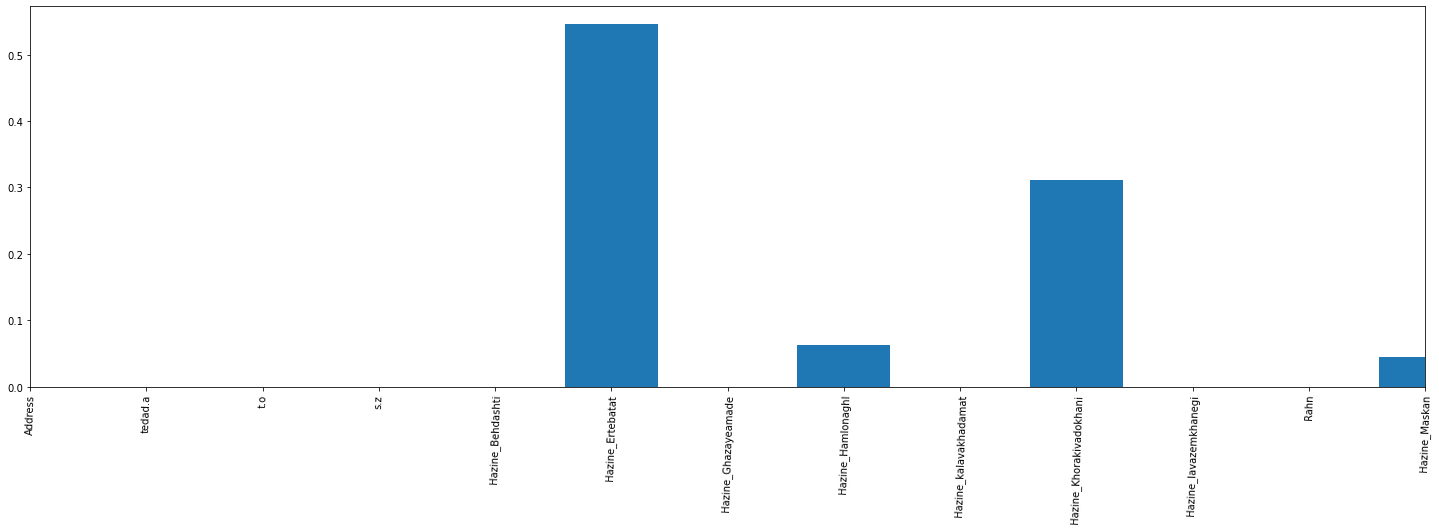

In [221]:
importance= dtree.named_steps['model'].feature_importances_
plt.figure(figsize= (25,7))
plt.bar(range(len(importance)), importance),
plt.xticks(range(len(importance)), all_features, rotation= 88)
plt.xlim(70, len(importance)- 5)

In [222]:
import pydotplus
import collections
from sklearn.tree import export_graphviz

In [223]:
#https://pythonprogramminglanguage.com/decision-tree-visual-example/
# Visualize data


dot_data = export_graphviz(dtree.named_steps['model'],
                                feature_names=all_features,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree2.png')

True

![](tree2.png)

### This Decision Tree only used 5 variables

## Tree with Post-Puruning

In [224]:
pipe= Pipeline([
    ('prep', preprocess_tree),
    ('model', DecisionTreeClassifier(random_state= 15))
])

In [225]:

params= {
    'model__ccp_alpha': np.linspace(0, 0.03, 20)
}

In [226]:
grid_tree2= GridSearchCV(pipe, param_grid= params, cv= 10,
                         scoring={'AP': "average_precision", "ac": "accuracy"},
                         refit= "AP", verbose= 1, n_jobs= 7,                         
                         return_train_score= True)
grid_tree2.fit(x_trainval, Y_trainval)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    1.9s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    8.7s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    9.2s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('prep',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('one-hot',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('cat',
                                                                                          OneHotEncoder(categories='auto',
                                                                                                        drop=None,
                                             

In [227]:
grid_tree2.best_params_

{'model__ccp_alpha': 0.003157894736842105}

In [228]:
grid_tree2.best_score_

0.5572836525178635

In [229]:
dtree2= grid_tree2.best_estimator_

In [230]:
#https://pythonprogramminglanguage.com/decision-tree-visual-example/
# Visualize data


dot_data = export_graphviz(dtree2.named_steps['model'],
                                feature_names=all_features,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('dtree2.png')

True

![](dtree2.png)

In [231]:
importance2= dtree2.named_steps['model'].feature_importances_

(24.0, 87.0)

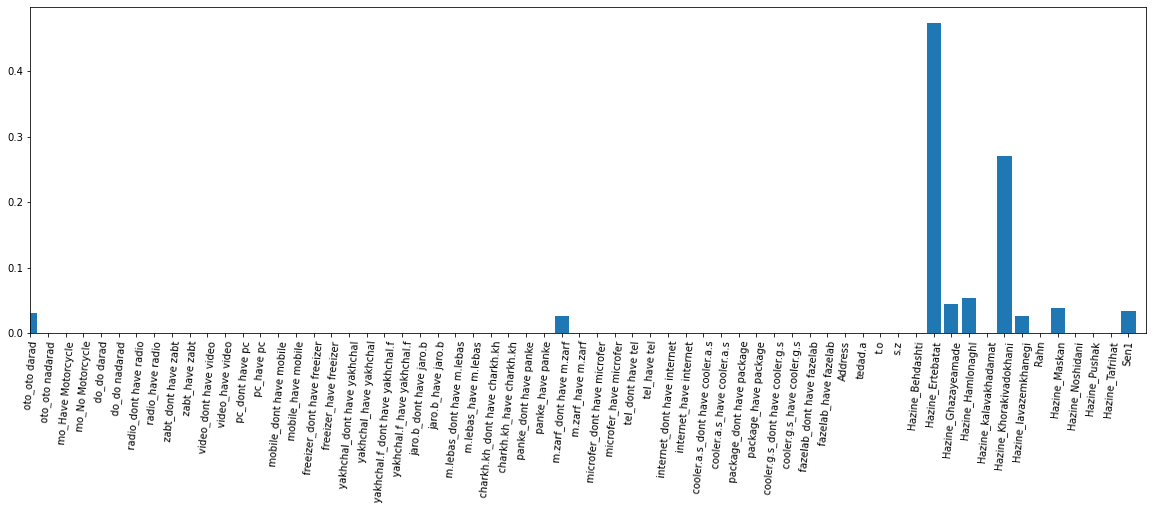

In [232]:
plt.figure(figsize=(20 ,6))
plt.bar(range(len(importance2)), importance2)
plt.xticks(range(len(importance2)), all_features, rotation= 85)
plt.xlim(24, len(importance2))

# Random Forest

In [233]:
from sklearn.ensemble import RandomForestClassifier

In [234]:
preprocess_RF= ColumnTransformer([
    ('cat', categorical_preprocess, categories),
    ('zip', zip_preprocess, ['Address']),
    ('num', 'passthrough', num)
])

pipe= Pipeline([
    ('prep', preprocess_RF),
    ('model', RandomForestClassifier(n_estimators= 450))
])



In [235]:
range_maxfeature=  np.arange(3, 15, 1)
params={'model__max_features': range_maxfeature}
grid_forest= GridSearchCV(pipe, param_grid= params,
                         scoring={'AP': "average_precision", "ac": "accuracy"},
                         refit= "AP", verbose= 1, n_jobs= 7,                          
                          cv= 5, return_train_score= True)
grid_forest.fit(x_trainval, Y_trainval)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:   25.5s
[Parallel(n_jobs=7)]: Done  60 out of  60 | elapsed:   39.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('prep',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('cat',
                                                                                          OneHotEncoder(categories='auto',
                                                                                                        drop=None,
                                                  

In [236]:
grid_forest.best_params_

{'model__max_features': 4}

In [237]:
grid_forest.best_score_

0.7014167235654052

In [238]:
rf= grid_forest.best_estimator_

In [239]:
importances= rf.named_steps['model'].feature_importances_

([<matplotlib.axis.YTick at 0xf0cb9605c8>,
 [Text(0, 0, 'Jens_Man'),
  Text(0, 0, 'Jens_Woman'),
  Text(0, 0, 'Madrak_Arshad& DR'),
  Text(0, 0, 'Madrak_Bisavad'),
  Text(0, 0, 'Madrak_Dabirestan o pish'),
  Text(0, 0, 'Madrak_Ebtedaii,Sayer,..'),
  Text(0, 0, 'Madrak_Kardani'),
  Text(0, 0, 'Madrak_Rahnamaii'),
  Text(0, 0, 'Madrak_licans'),
  Text(0, 0, 'Faaliat_bikarjoya|Mohasel|khane'),
  Text(0, 0, 'Faaliat_daraie daramad bedune kar'),
  Text(0, 0, 'Faaliat_shaqel'),
  Text(0, 0, 'Zanashoi_Daraie Hamsar'),
  Text(0, 0, 'Zanashoi_fot Hamsar'),
  Text(0, 0, 'Zanashoi_single'),
  Text(0, 0, 'Zanashoi_talaq Hamsar'),
  Text(0, 0, 'n.t.m_Ejari'),
  Text(0, 0, 'n.t.m_Khedmat&Melki-Ayan'),
  Text(0, 0, 'n.t.m_Melki-Arse-Ayan'),
  Text(0, 0, 'n.t.m_Rahn'),
  Text(0, 0, 'n.t.m_Sayer&Raygan'),
  Text(0, 0, 'n.e_Beton-Arme'),
  Text(0, 0, 'n.e_Felezi'),
  Text(0, 0, 'n.e_sayer'),
  Text(0, 0, 'oto_oto darad'),
  Text(0, 0, 'oto_oto nadarad'),
  Text(0, 0, 'mo_Have Motorcycle'),
  Text(0, 0, 

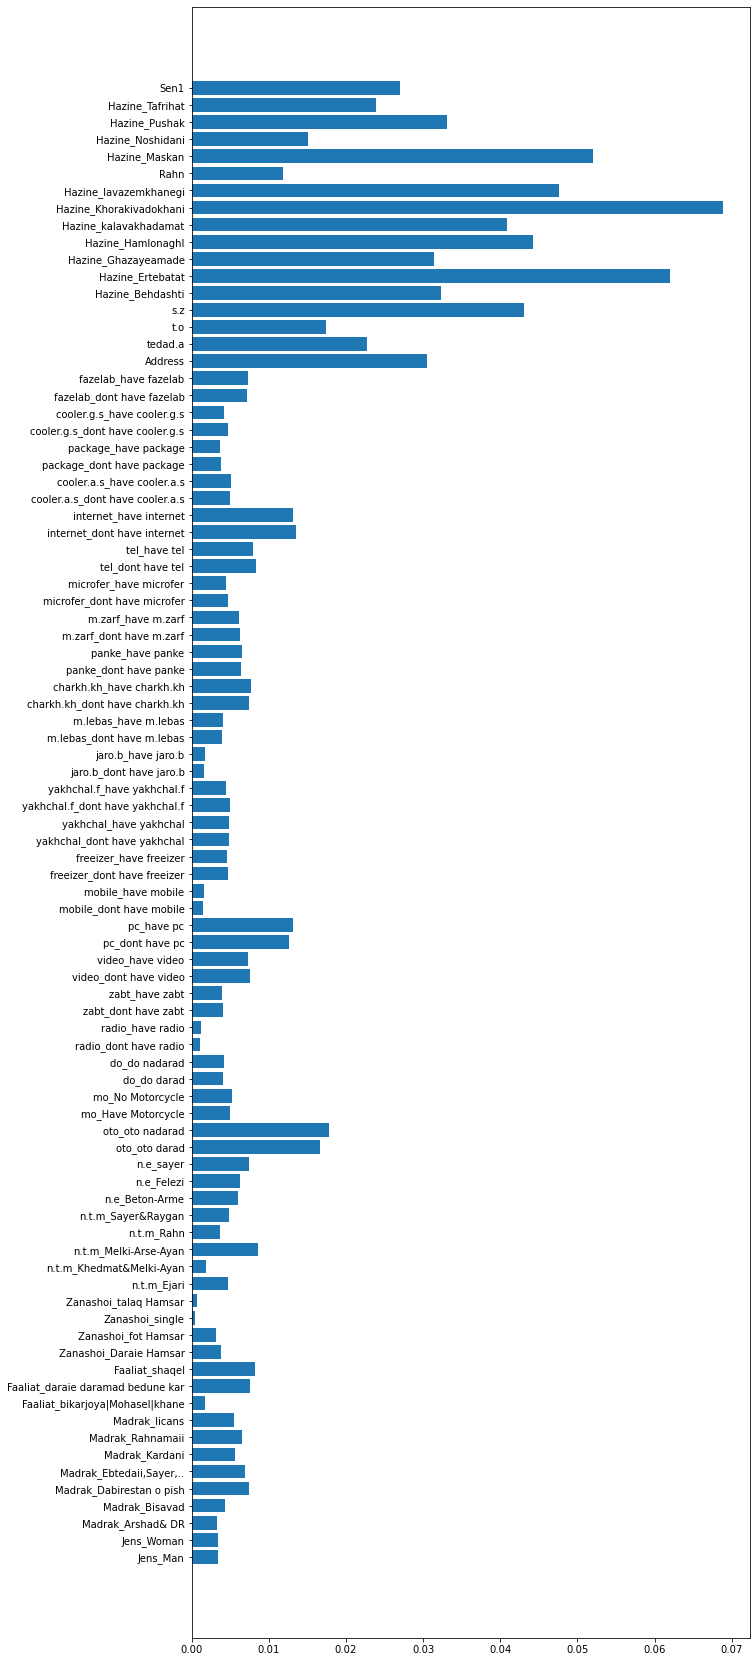

In [240]:
plt.figure(figsize= (10, 30))
plt.barh(range(len(importances)), importances)
plt.yticks(range(len(importances)), all_features)

# Gradient Boosting

## xg boosting

In [241]:
from xgboost import XGBClassifier

In [242]:
preprocess_xgb= ColumnTransformer([
      ('cat', categorical_preprocess, categories),
      ('zips', zip_preprocess, ["Address"]),
      ('num', 'passthrough', num)
])

In [243]:
pipe= Pipeline([
                ('prep', preprocess_xgb),
                ('model', XGBClassifier(max_depth= 2, n_estimators= 400))
])

In [244]:
params2= {'model__learning_rate': np.logspace(-3, -1, 25)
         }

In [245]:
grid_xgb2= GridSearchCV(pipe, param_grid= params2, return_train_score= True,
                       scoring={'AP': "average_precision", 'ac': "accuracy"},cv= 5,
                        refit= "AP", verbose= 1, n_jobs= 7)

In [246]:
grid_xgb2.fit(x_trainval, Y_trainval)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:   13.2s
[Parallel(n_jobs=7)]: Done 125 out of 125 | elapsed:   40.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('prep',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('cat',
                                                                                          OneHotEncoder(categories='auto',
                                                                                                        drop=None,
                                                  

In [247]:
grid_xgb2.best_params_

{'model__learning_rate': 0.03162277660168379}

In [248]:
grid_xgb2_df=pd.DataFrame(grid_xgb2.cv_results_)

In [249]:
grid_xgb2.score(x_test, Y_test)

0.7377540014026258

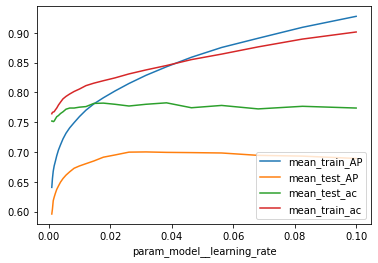

In [250]:
a= grid_xgb2_df.plot("param_model__learning_rate", "mean_train_AP")
b= grid_xgb2_df.plot("param_model__learning_rate", "mean_test_AP", ax= plt.gca())
c= grid_xgb2_df.plot("param_model__learning_rate", "mean_test_ac", ax= plt.gca())
d= grid_xgb2_df.plot("param_model__learning_rate", "mean_train_ac", ax= plt.gca())

In [252]:
model_xgb2= grid_xgb2.best_estimator_

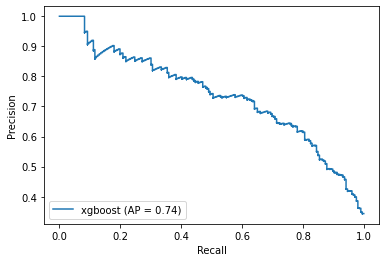

In [253]:
prc_xgb= plot_precision_recall_curve(model_xgb2, x_test, Y_test, name= 'xgboost')

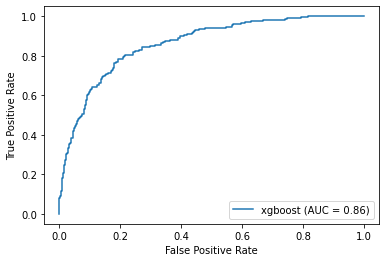

In [254]:
roc_xgb= plot_roc_curve(model_xgb2, x_test, Y_test, name= 'xgboost')

## So the best model based on average-precision score is xgboost and now we we will find the best threshold so that our macro average is maximum

In [255]:
rc2= []
for i in np.arange(0, 0.6, 0.01):
    y_pred22= model_xgb2.predict_proba(x_trainval)[:, 1] > i
    rc2.append(recall_score(Y_trainval, y_pred22, average= "macro"))
print("the max is: %0.4f and argmax is: %i"%(np.max(rc2), np.argmax(rc2)))    
#print("Accuracy : %0.2f (+/- %0.2f)"%(scores.mean(), scores.std()))


the max is: 0.8251 and argmax is: 31


## And at last we will evaluate them on the test set for just one time

In [256]:
y_pred22= model_xgb2.predict_proba(x_test)[:, 1] > 0.30
print(classification_report(Y_test, y_pred22))

              precision    recall  f1-score   support

         0.0       0.90      0.78      0.84       481
         1.0       0.61      0.81      0.70       206

    accuracy                           0.79       687
   macro avg       0.76      0.79      0.77       687
weighted avg       0.82      0.79      0.80       687



In [257]:
recall_score(Y_test, y_pred22, average= "macro")

0.7948045132511152

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xf0cc3230c8>)

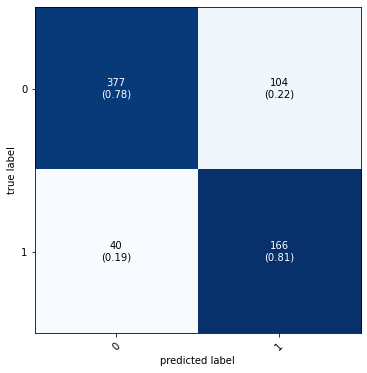

In [258]:
matrix= confusion_matrix(Y_test, y_pred22)
class_names= ["0", "1"]
ml_plot_confusion_matrix(matrix, figsize= (6, 6), show_normed= True, class_names= class_names)